In [1]:
# loading data and removing redundancies in patients
all_ALL = read.csv("All Patient Data.csv",stringsAsFactors = TRUE)
head(all_ALL)
all_ALL = all_ALL[!duplicated(all_ALL$TARGET.USI),]

,TARGET.USI,Gender,Race,Ethnicity,Age.at.Diagnosis.in.Days,First.Event,Event.Free.Survival.Time.in.Days,Vital.Status,Overall.Survival.Time.in.Days,Year.of.Diagnosis,...,BMA.Blasts.Day.43,Karyotype,Down.Syndrome,DNA.Index,Alternate.Therapy,Alternate.Therapy.Other,Cell.of.Origin,ALL.Molecular.Subtype,ALL.Gene.Expression.Subtype,Comment
,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<int>,...,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<lgl>,<fct>
1,TARGET-10-PANSHK,Male,White,Not Hispanic or Latino,837,Relapse,1354,Dead,2447,2005,...,NA,"46,XY,t(2;12)(p15;p12),del(7)(p11.2p22),der(12)inv(12)(p13q15)add(12)(q24)[3]/47,idem,+10[15]/48,idem,+10,+21[2]/46,XY[1]",No,1.000,CHEMOTHERAPY; Transplant,,B-Precursor,,NA,
2,TARGET-10-PANSIZ,Male,White,Not Hispanic or Latino,1652,None,3612,Alive,3612,2005,...,NA,,No,1.174,,,B-Precursor,,NA,
3,TARGET-10-PANSTA,Female,White,Not Hispanic or Latino,884,None,3821,Alive,3821,2005,...,NA,"46,XX,-1,-13,der(14)t(1;14)(p22;q32.1),+der(?)(?;1)(?;q25),+mar[14]/46,XX[6]",No,1.000,,,B-Precursor,,NA,
4,TARGET-10-PANSYA,Female,Black or African American,Not Hispanic or Latino,1443,None,3680,Alive,3680,2005,...,NA,,No,1.000,,,B-Precursor,,NA,
5,TARGET-10-PANTBB,Male,Unknown,Unknown,1104,None,3668,Alive,3668,2005,...,NA,"46,XY,add(19)(p13)[6]/46,XY[19]",No,1.109,,,B-Precursor,,NA,
6,TARGET-10-PANTCR,Male,White,Unknown,2059,None,2403,Unknown,2403,2005,...,NA,"45-48,add(12)(p13.1),add(14)(q22),-15,-20,+21,+1-2mar[cp12]/46,XY[8]",No,1.000,CHEMOTHERAPY,,B-Precursor,,NA,


Take a look at the continuous variables, their descriptive statistics, and the normality of their distribution

Loading required package: ggplot2



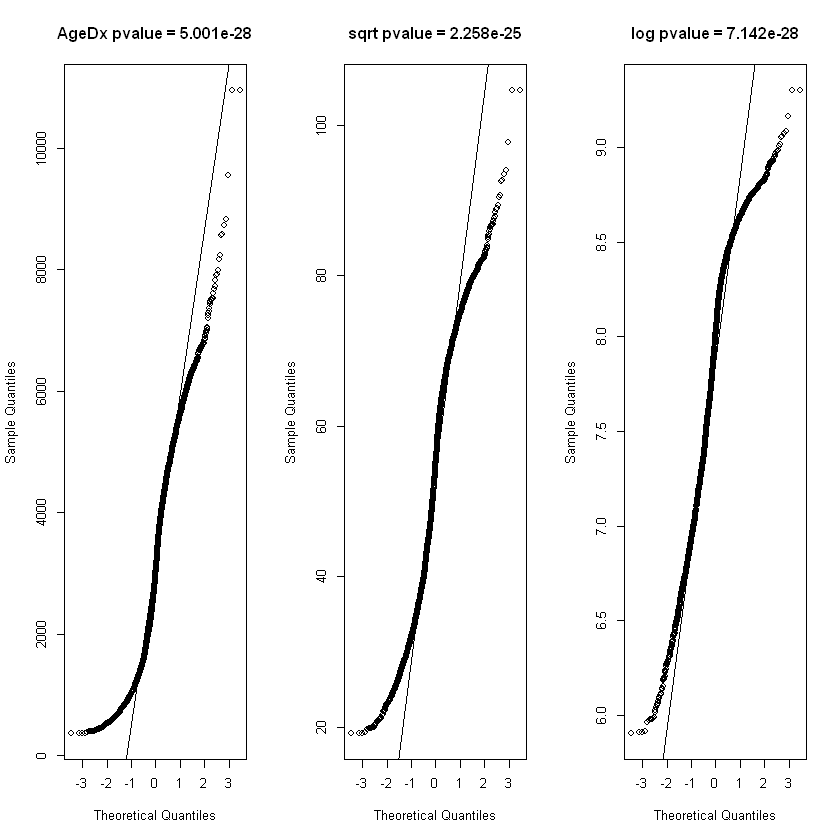

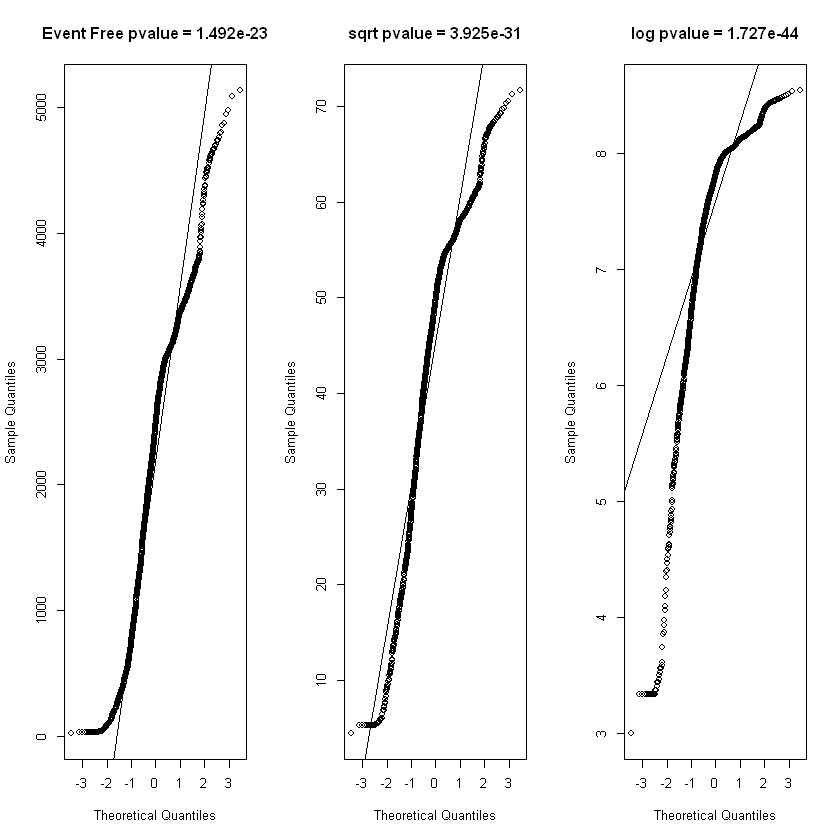

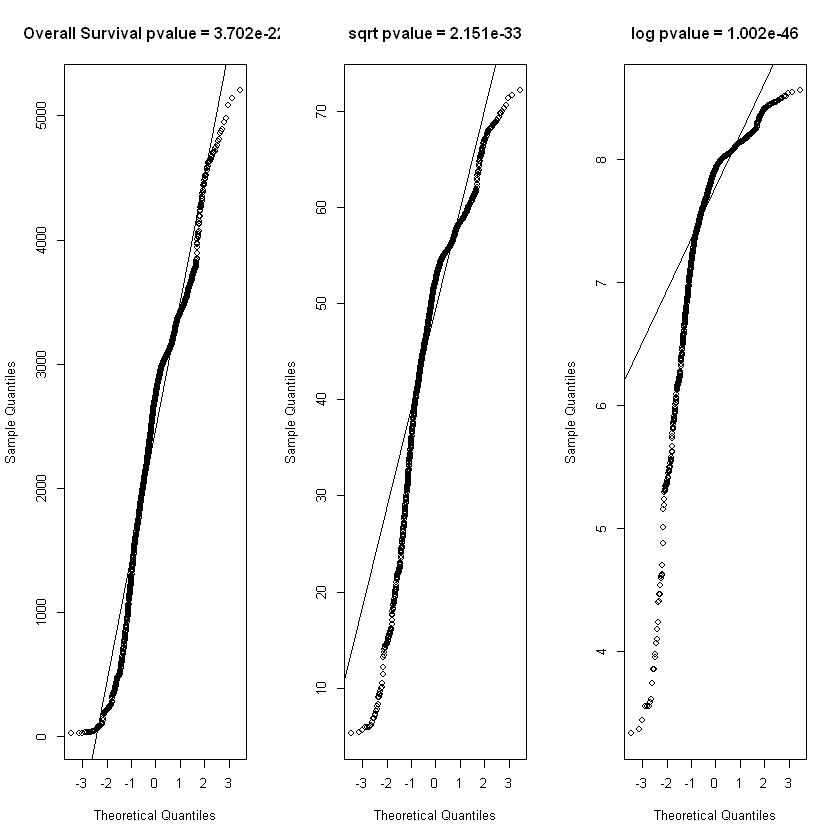

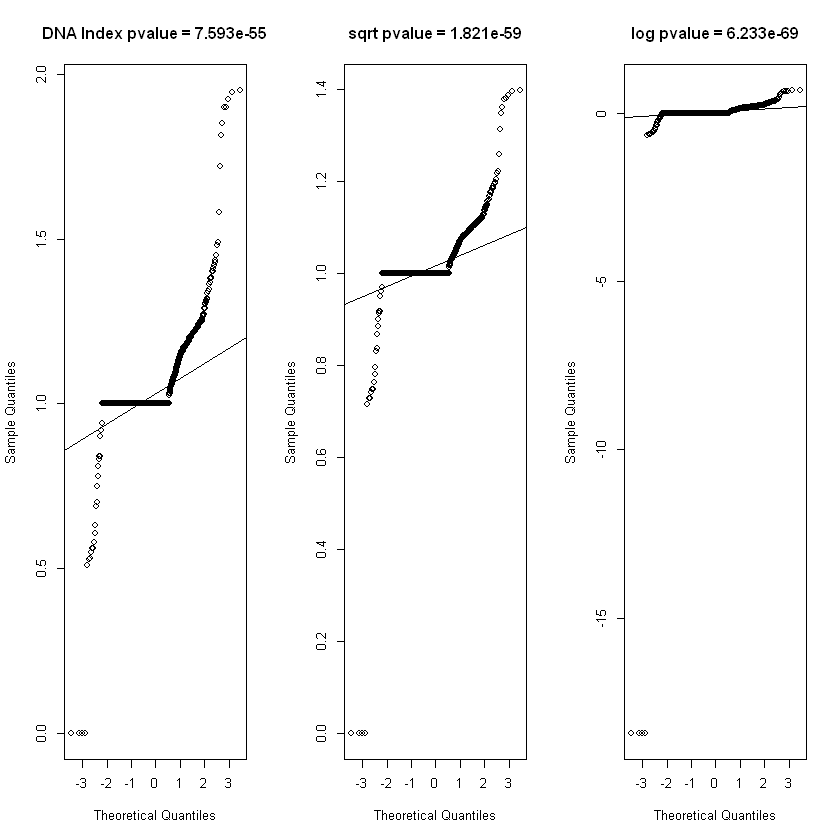

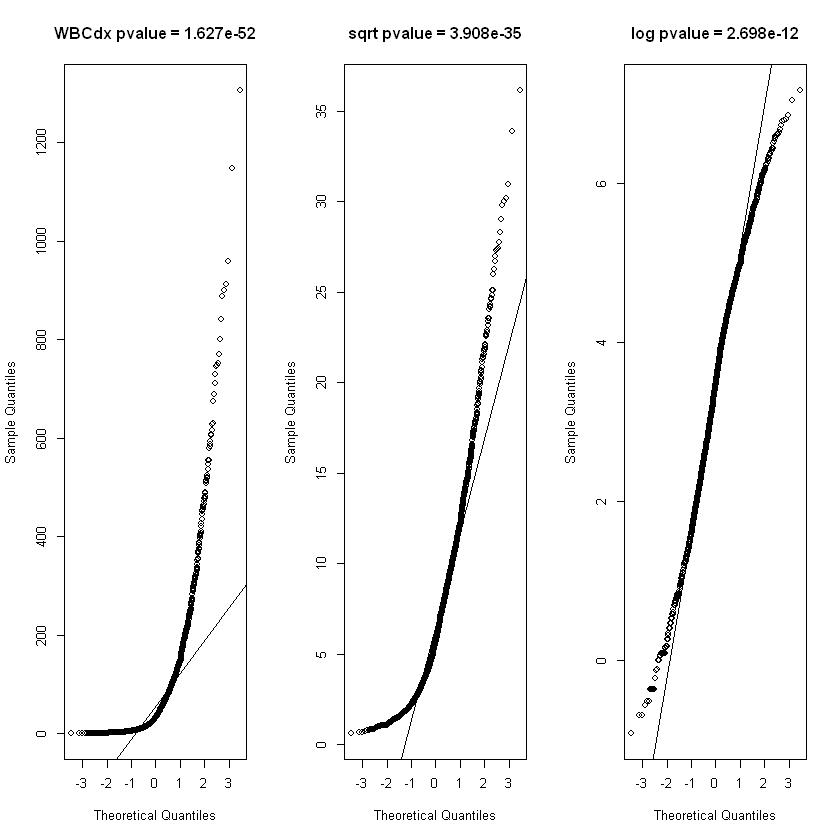

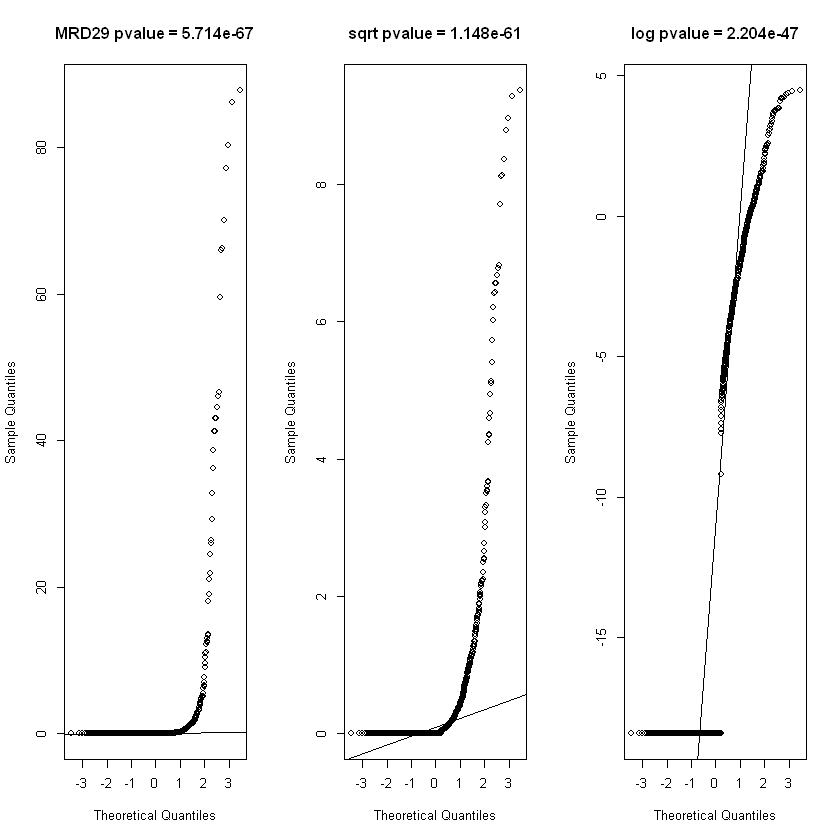

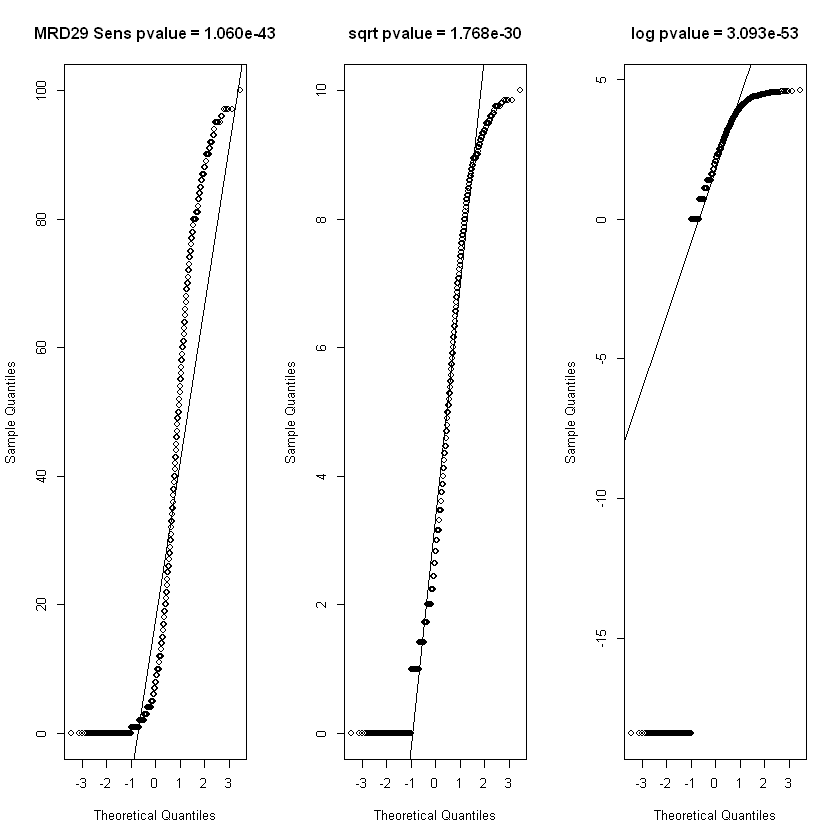

,Mean,Median,Std. Dev.,Range,Max,Min
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Age.at.Diagnosis.in.Days,3260.6455412,3021.0,2036.7902846,10579.00,10946.00,367.0
Event.Free.Survival.Time.in.Days,2227.1015143,2471.0,1165.6614468,5117.00,5137.00,20.0
Overall.Survival.Time.in.Days,2464.0257992,2737.0,1062.3758671,5176.00,5204.00,28.0
DNA.Index,1.0420839,1.0,0.1185333,1.95,1.95,0.0
WBC.at.Diagnosis,81.0757880,32.3,127.3354276,1305.60,1306.00,0.4
MRD.Day.29,0.9671671,0.0,6.2009335,87.80,87.80,0.0
BMA.Blasts.Day.8,21.2091954,8.0,26.6933026,100.00,100.00,0.0
BMA.Blasts.Day.29,1.4185520,0.0,6.0407160,89.00,89.00,0.0


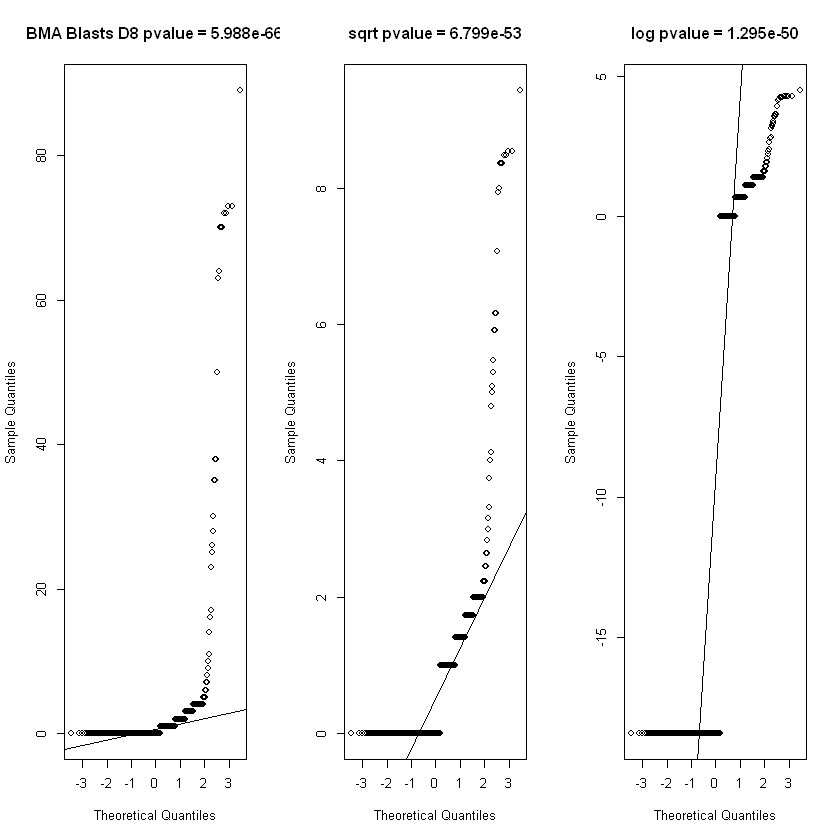

In [2]:
library("ggpubr")
options(scipen = 6)
# descriptive statistics of continous variables
cont_var = c("Age.at.Diagnosis.in.Days","Event.Free.Survival.Time.in.Days","Overall.Survival.Time.in.Days","DNA.Index",
             "WBC.at.Diagnosis","MRD.Day.29","BMA.Blasts.Day.8","BMA.Blasts.Day.29")
good_var = c("AgeDx","Event Free","Overall Survival","DNA Index","WBCdx","MRD29","MRD29 Sens","BMA Blasts D8",
            "BMA Blasts D29")
cont_stats = data.frame(matrix(0,nrow=length(cont_var),ncol= 6))
rownames(cont_stats) = cont_var
colnames(cont_stats) = c("Mean","Median","Std. Dev.","Range","Max","Min")
k = 1
for(var in cont_var){
    cont_stats[var,"Mean"] = mean(unlist(all_ALL[var]),na.rm = TRUE)
    cont_stats[var,"Median"] = median(unlist(all_ALL[var]),na.rm = TRUE)
    cont_stats[var,"Std. Dev."] = sd(unlist(all_ALL[var]),na.rm = TRUE)
    cont_stats[var,"Range"] = max(unlist(all_ALL[var]),na.rm = TRUE) - min(unlist(all_ALL[var]),na.rm = TRUE)
    cont_stats[var,"Max"] = max(unlist(all_ALL[var]),na.rm = TRUE)
    cont_stats[var,"Min"] = min(unlist(all_ALL[var]),na.rm = TRUE)
    shap_p = shapiro.test(unlist(all_ALL[var]))$p.value
    shap_p_sqrt = shapiro.test(sqrt(unlist(all_ALL[var])))$p.value
    shap_p_log = shapiro.test(log(unlist(all_ALL[var]+0.00000001)))$p.value
    shap_test = sprintf("%s pvalue = %1.3e",good_var[k],shap_p)
    shap_test_sqrt = sprintf("sqrt pvalue = %1.3e",shap_p_sqrt)
    shap_test_log = sprintf("log pvalue = %1.3e",shap_p_log)
    par(mfrow=c(1,3))
    qqnorm(unlist(all_ALL[var]),main = shap_test)
    qqline(unlist(all_ALL[var]))
    qqnorm(sqrt(unlist(all_ALL[var])),main = shap_test_sqrt)
    qqline(sqrt(unlist(all_ALL[var])))
    qqnorm(log(unlist(all_ALL[var]+0.00000001)),main = shap_test_log)
    qqline(log(unlist(all_ALL[var]+0.00000001)))
#     plot(density(unlist(all_ALL[var]),na.rm = TRUE),main = shap_test)
#     plot(density(sqrt(unlist(all_ALL[var])),na.rm = TRUE),main = shap_test_sqrt)
#     plot(density(log(unlist(all_ALL[var])),na.rm = TRUE),main = shap_test_log)
    k = k+1
}
cont_stats


None of these variables were even close to being normally distributed, however, because of the high sample size (1700+) the central limit theorem says we can still use parameteric tests if we were to take random samples from these distrubtions that are greater than a N of 30.

Next I will take a look at the categorical variables and the frequencies of different factors, etc.

In [3]:
# Evaluating probabilites/percentages of categorical variables
# head(all_ALL)
cat_var = c("Gender","Race","Ethnicity","First.Event","Vital.Status","Down.Syndrome","Cell.of.Origin",
            "Bone.Marrow.Site.of.Relapse","CNS.Site.of.Relapse","Testes.Site.of.Relapse","Other.Site.of.Relapse",
           "ETV6.RUNX1.Fusion.Status")
cat_data = all_ALL[cat_var]
beta = cat_data$Cell.of.Origin == "B precursor"
cat_data$Cell.of.Origin[beta] = "B-Precursor"
# head(cat_data)
# summary(cat_data)
cat_props_perc = list()
cat_props_total =list()
k=0
for(var in cat_var){
    k = k+1
    t = table(cat_data[var])/length(cat_data$Gender)
    t2 = table(cat_data[var])
    cat_props_perc[var] = list(t)
    cat_props_total[var] = list(t2)
}
cat_props_perc
cat_props_total


$Gender

   Female      Male 
0.4026921 0.5973079 

$Race

         American Indian or Alaska Native 
                              0.005047672 
                                    Asian 
                              0.042624790 
                Black or African American 
                              0.070667414 
Native Hawaiian or other Pacific Islander 
                              0.005047672 
                                  Unknown 
                              0.126191812 
                                    White 
                              0.750420639 

$Ethnicity

    Hispanic or Latino Not Hispanic or Latino                Unknown 
             0.1828379              0.7162086              0.1009534 

$First.Event

               Censored                   Death Death without Remission 
           0.0925406618            0.0229949523            0.0005608525 
      Induction failure                    None             Progression 
           0.0100953449            0.6

$Gender

Female   Male 
   718   1065 

$Race

         American Indian or Alaska Native 
                                        9 
                                    Asian 
                                       76 
                Black or African American 
                                      126 
Native Hawaiian or other Pacific Islander 
                                        9 
                                  Unknown 
                                      225 
                                    White 
                                     1338 

$Ethnicity

    Hispanic or Latino Not Hispanic or Latino                Unknown 
                   326                   1277                    180 

$First.Event

               Censored                   Death Death without Remission 
                    165                      41                       1 
      Induction failure                    None             Progression 
                     18                    1129   

In [4]:
# US population characteristics to compare against
USage = matrix(c(0.06,0.223,0,0.165),nrow = 1,ncol = 4)
USage[3] = 1-sum(USage)
USage = data.frame(USage)
colnames(USage) = c("Under 5","5-18","18-65","Over 65")
USrace = matrix(c(0.013,0.059,0.134,0.002,0.763),nrow = 1)
USrace = data.frame(USrace/sum(USrace))
colnames(USrace) = c("American Indian","Asian","Black","Pacific Islander","White")
USeth = data.frame(matrix(c(0.185,0.601)/(0.185+0.601),nrow = 1))
colnames(USeth) = c("Hispanic","Not-Hispanic")
USgender = data.frame(matrix(c(0.508,1-0.508),nrow=1))
colnames(USgender)=c("Male","Female")

[1] 5

[1] 1

Warning message in chisq.test(cat_props_total$Race[c(1, 2, 3, 4, 6)], p = USrace):
"Chi-squared approximation may be incorrect"



	Chi-squared test for given probabilities

data:  cat_props_total$Race[c(1, 2, 3, 4, 6)]
X-squared = 68.287, df = 4, p-value = 5.217e-14


American Indian or Alaska Native,Asian,Black or African American,Native Hawaiian or other Pacific Islander,White
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20.85891,94.66735,215.0072,3.209063,1224.257



	Chi-squared test for given probabilities

data:  cat_props_total$Ethnicity[c(1, 3)]
X-squared = 470.09, df = 1, p-value < 2.2e-16



	Chi-squared test for given probabilities

data:  cat_props_total$Gender
X-squared = 79.112, df = 1, p-value < 2.2e-16


American Indian,Asian,Black,Pacific Islander,White
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.006169377,0.04879417,0.08076276,0.005608525,0.8586652


Warning message in chisq.test(unlist(adj_race), p = USrace):
"Chi-squared approximation may be incorrect"



	Chi-squared test for given probabilities

data:  unlist(adj_race)
X-squared = 76.427, df = 4, p-value = 9.944e-16


American Indian,Asian,Black,Pacific Islander,White
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
23.87127,108.3388,246.0577,3.672503,1401.06


Under 5,5-18,18-65,Over 65
<dbl>,<dbl>,<dbl>,<dbl>
0.3555805,0.604599,0.03982053,0



	Chi-squared test for given probabilities

data:  unlist(ALL_cat_age)
X-squared = 4902.1, df = 3, p-value < 2.2e-16


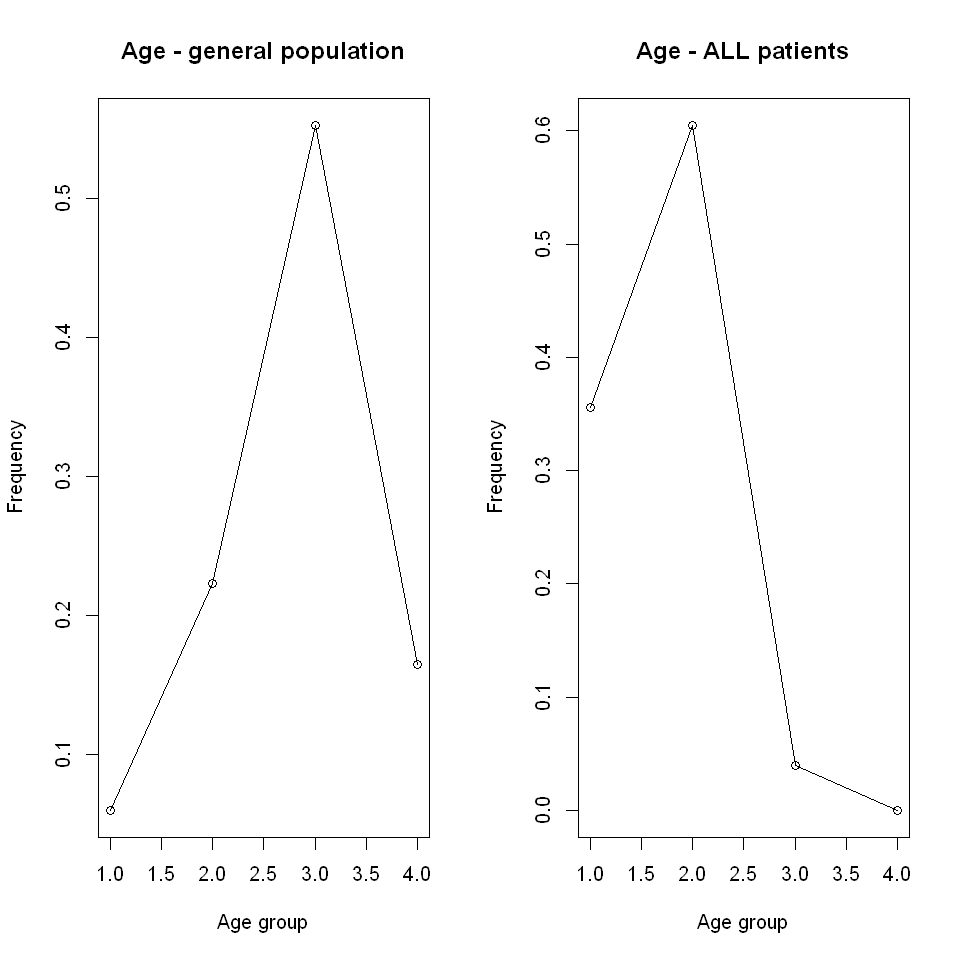

In [5]:
# Chi-square tests to determine if these population characteristics are different
length(cat_props_total$Race[c(1,2,3,4,6)])
sum(USrace)
Xrace = chisq.test(cat_props_total$Race[c(1,2,3,4,6)],p = USrace)
Xrace
Xrace$expected
Xeth = chisq.test(cat_props_total$Ethnicity[c(1,3)],p = USeth)
Xeth
Xgen = chisq.test(cat_props_total$Gender,p = USgender)
Xgen
# adjusting race so unknown is spread out by proportion of other races
ind = c(1,2,3,4,6)
adj_race = cat_props_perc$Race[ind]/sum(cat_props_perc$Race[ind])
adj_race = data.frame(matrix(round(adj_race*sum(cat_props_total$Race)),nrow=1))
adj_race[1,1] = adj_race[1,1]+1
t = table(adj_race)
colnames(adj_race) = c("American Indian","Asian","Black","Pacific Islander","White")
adj_race_perc = adj_race/1783
adj_race_perc
Xrace_adj = chisq.test(unlist(adj_race),p=USrace)
Xrace_adj
Xrace_adj$expected
# finding distribution of ages following that used in census
ALL_cat_age = c(sum(all_ALL$Age.at.Diagnosis.in.Days/365 <= 5),sum(all_ALL$Age.at.Diagnosis.in.Days/365 <=18)-
                sum(all_ALL$Age.at.Diagnosis.in.Days/365 <= 5),
                sum(all_ALL$Age.at.Diagnosis.in.Days/365 >= 18),sum(all_ALL$Age.at.Diagnosis.in.Days/365 > 65))
ALL_cat_age = data.frame(matrix(ALL_cat_age,nrow=1))
colnames(ALL_cat_age) = c("Under 5","5-18","18-65","Over 65")
ALL_cat_age/1783
Xage = chisq.test(unlist(ALL_cat_age),p = USage)
Xage 
options(repr.plot.width = 8, repr.plot.height = 8)
par(mfrow=c(1,2))
plot(unlist(USage),type = 'o',main = "Age - general population",xlab = "Age group",ylab = "Frequency")
plot(unlist(ALL_cat_age)/1783,type = 'o',main = "Age - ALL patients",xlab = "Age group",ylab = "Frequency")

Chi-squared test shows that for these categorical descriptors of the patient population frequencies of Race, Ethnicity, Age, and Gender are unequally distributed compared to the US. 

In [6]:
# addressing relapse - using relapse as a binary by removing location of relapse
bm_relapse = all_ALL$Bone.Marrow.Site.of.Relapse == "Yes"
cns_relapse = all_ALL$CNS.Site.of.Relapse == "Yes"
t_relapse = all_ALL$Testes.Site.of.Relapse == "Yes"
other_relapse = all_ALL$Other.Site.of.Relapse == "Yes"
relapse = matrix(0,nrow = length(bm_relapse),ncol=4)
relapse[,1] = bm_relapse
relapse[,2] = cns_relapse
relapse[,3] = t_relapse
relapse[,4] = other_relapse
relapse = rowSums(relapse)
all_ALL$Relapse = relapse >0


Now that I have determined that the patient demographics are significantly than the general US population I will look into any exisiting correlations between the continuous variables, patient demographics, and overall survival.

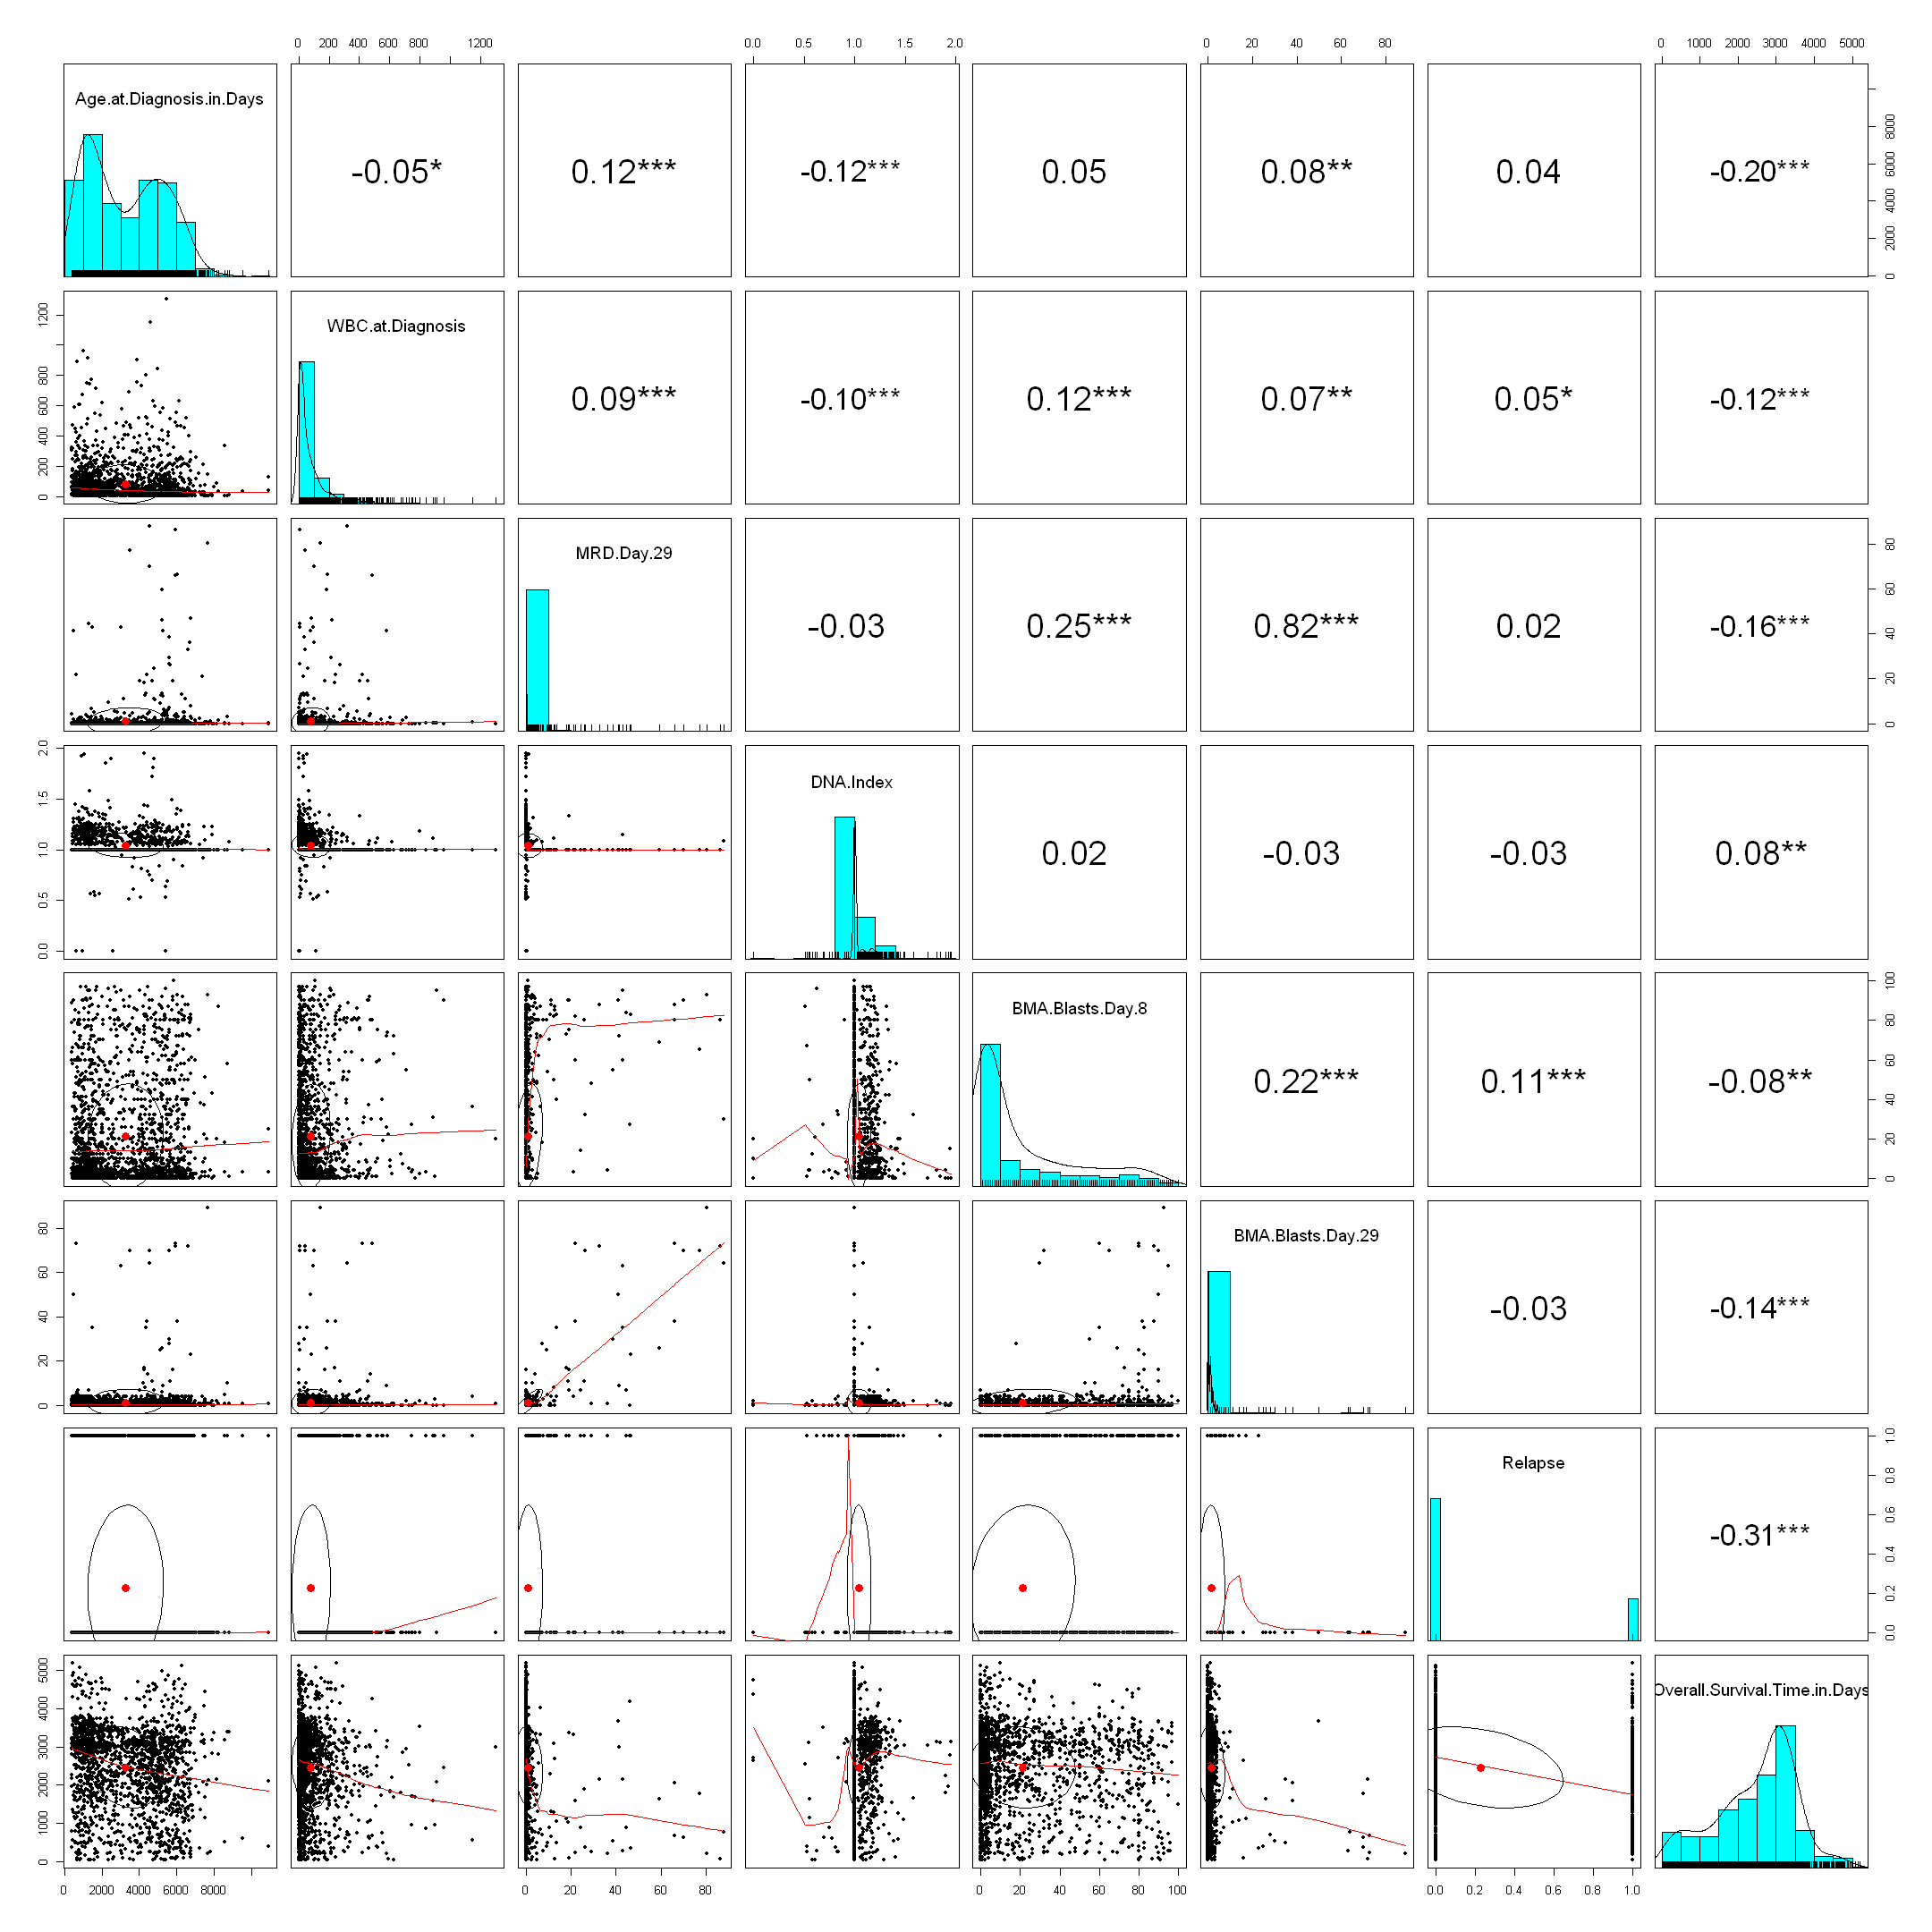

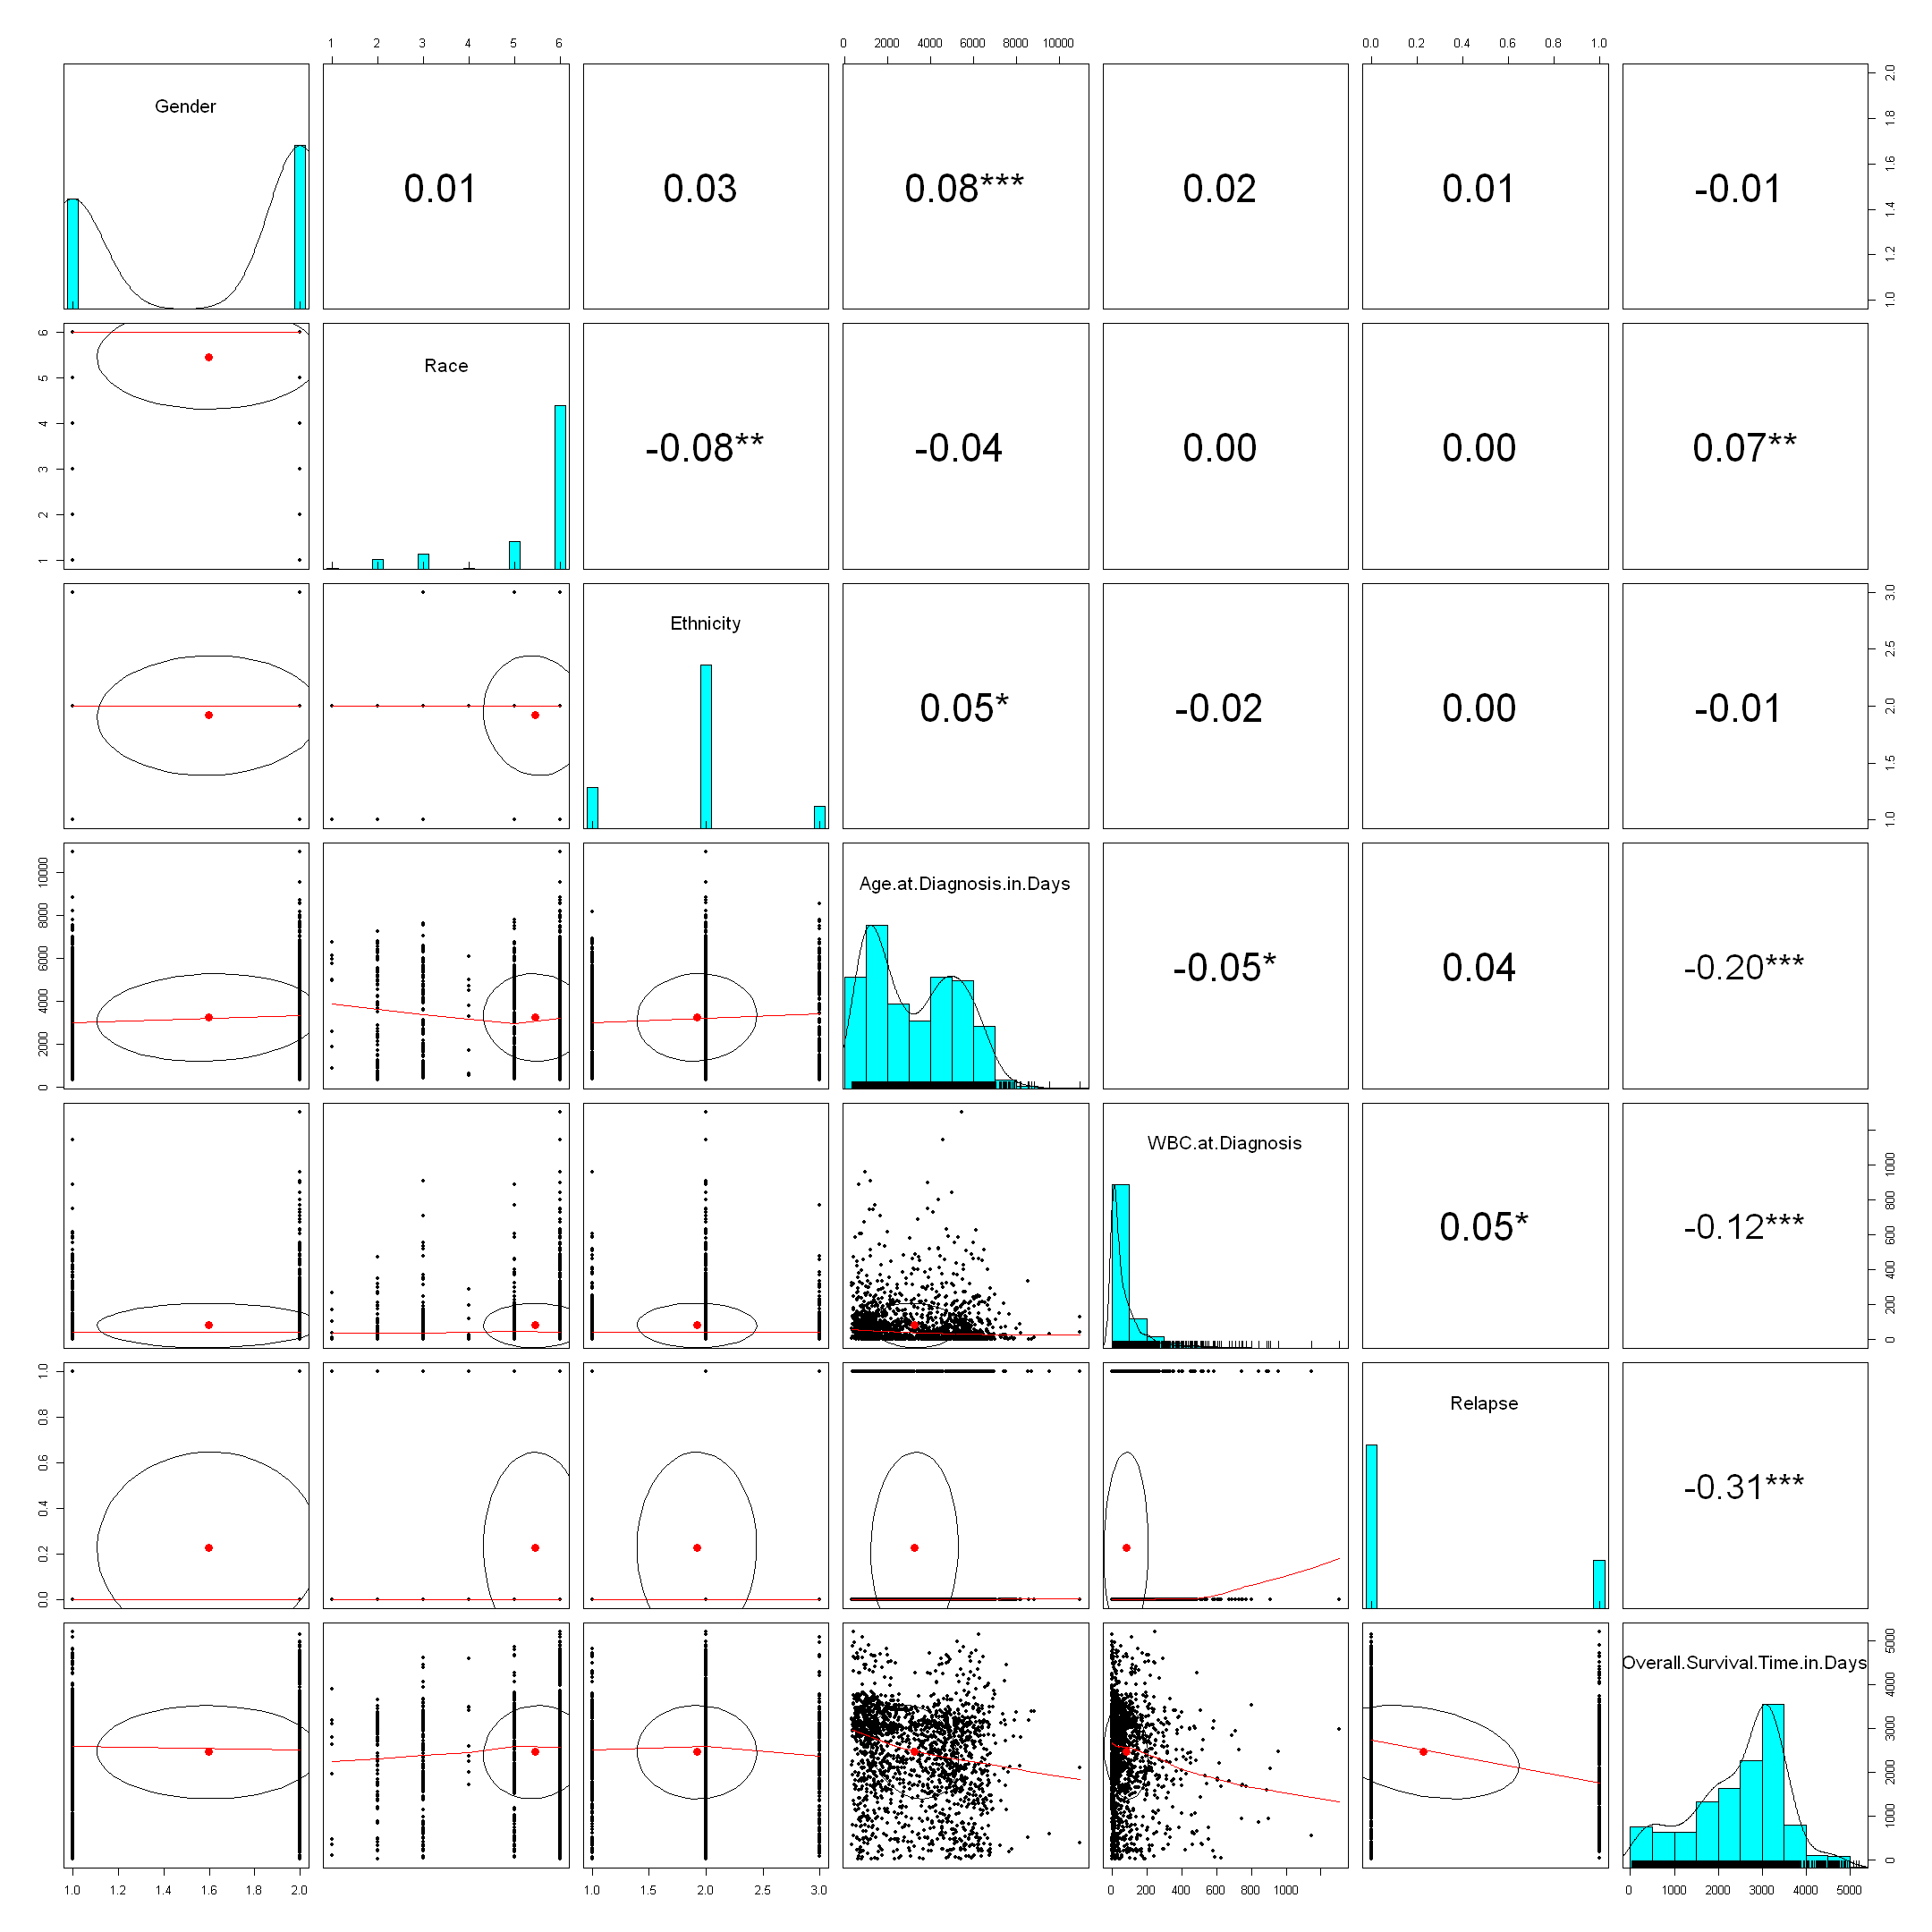

In [21]:
# Correlation between patient descriptors and severity indicators?
library(tidyverse)  # data manipulation
library(cluster)    # clustering algorithms
# install.packages("factoextra")
library(factoextra)
# install.packages("dendextend")
library(dendextend)
# install.packages("psych")
library(psych)

# pos_mrd = all_ALL$MRD.Day.29 >= all_ALL$MRD.Day.29.Sensitivity.
# na_mrd = is.na(all_ALL$MRD.Day.29.Sensitivity.) 
# placehold = all_ALL$MRD.Day.29
# placehold[pos_mrd] = "Positive"
# placehold[!pos_mrd] = "Negative"
# placehold[na_mrd] = "Unknown"
# all_ALL["MRD.Day.29"] = factor(placehold)

options(repr.plot.width = 18, repr.plot.height = 18)
pairs.panels(all_ALL[c("Age.at.Diagnosis.in.Days","WBC.at.Diagnosis","MRD.Day.29","DNA.Index",
                "BMA.Blasts.Day.8","BMA.Blasts.Day.29","Relapse","Overall.Survival.Time.in.Days")],stars=TRUE,
                 cex = 2,cex.labels=1.45)
pairs.panels(all_ALL[c("Gender","Race","Ethnicity","Age.at.Diagnosis.in.Days","WBC.at.Diagnosis","Relapse",
                       "Overall.Survival.Time.in.Days")],stars=TRUE,cex = 2,cex.labels=1.6)

Seeing that there is significant correlation between variables and between overall survival time and other variables I will build predictive models to determine the predictablility and role the different explanatory variables play - this includes using regularization in the logistic model to remove unneeded variables.

NOTE: It was later realized that the non-normal distrubtions and time-dependent data type of events makes logistic models and linear models inappropriate for their prediction and was not accounting for censorship of the data.

[1] 1076014

Model AIC: LASSO - -307306899 
 Ridge - -306839259 
 Elastic Net - -307307298

Ridge MSE: 1058938

Elastic Net MSE: 1060861

`geom_smooth()` using formula 'y ~ x'



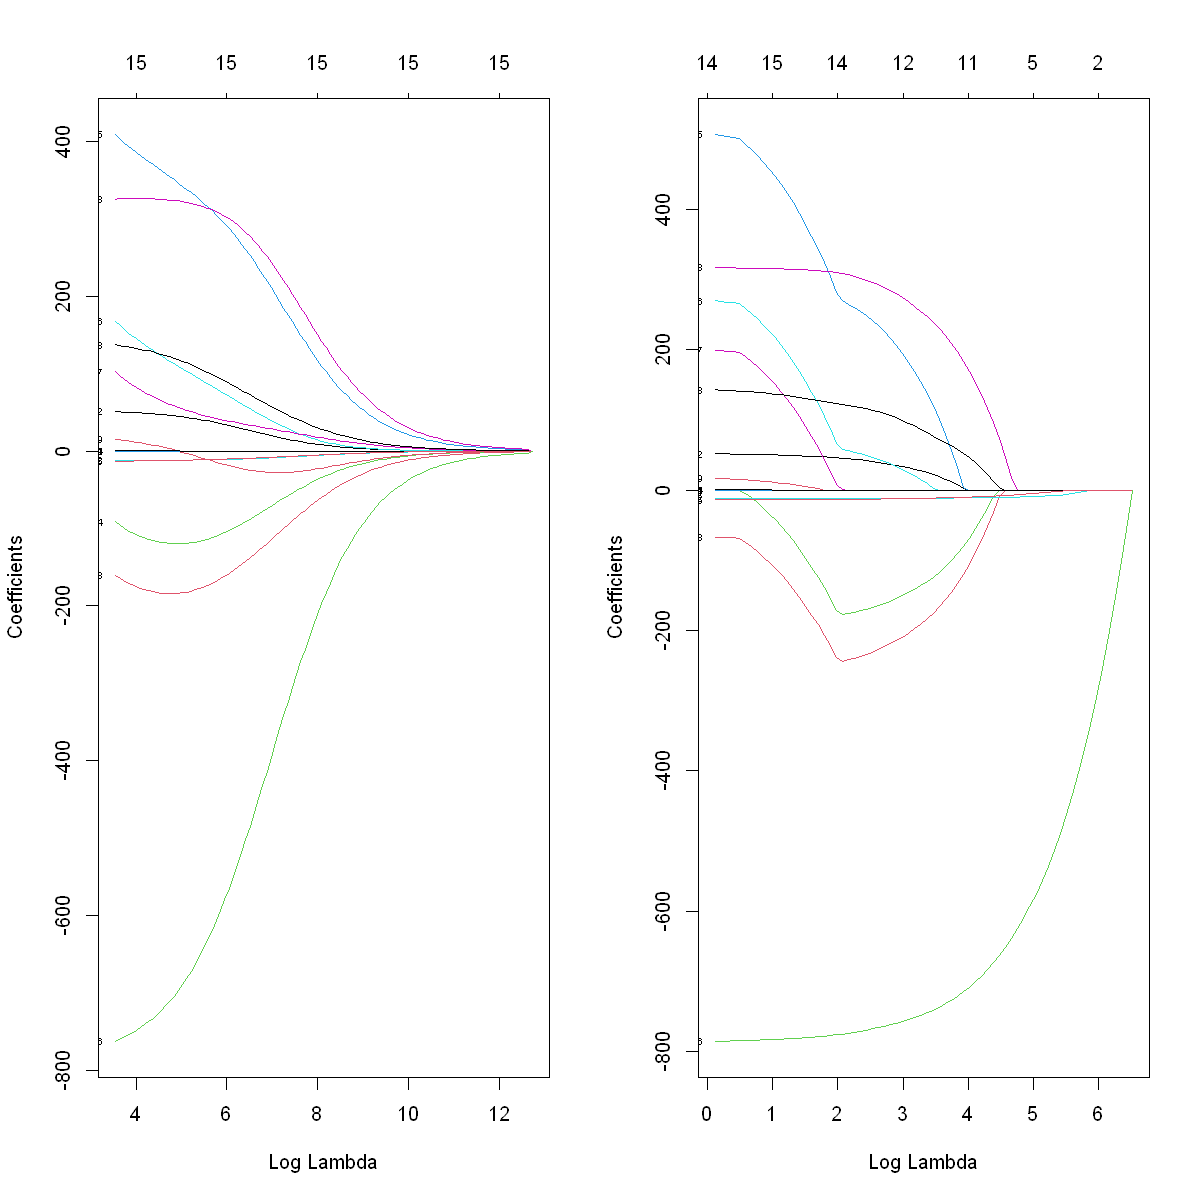

`geom_smooth()` using formula 'y ~ x'



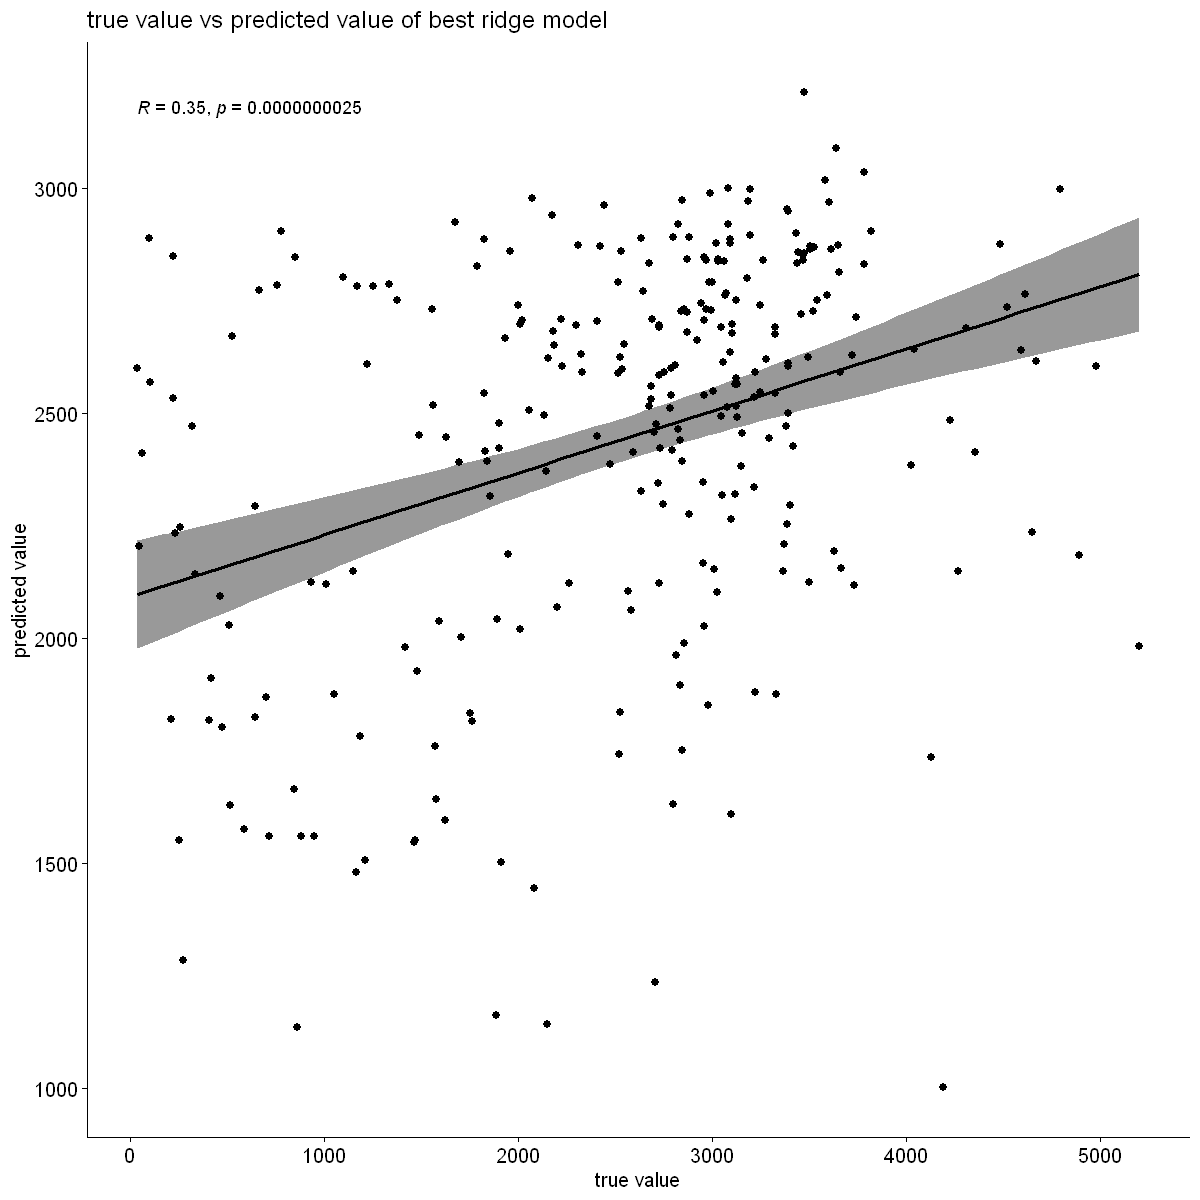

17 x 1 sparse Matrix of class "dgCMatrix"
                                                         1
(Intercept)                                   2357.3068371
(Intercept)                                      .        
GenderMale                                      51.7850180
RaceAsian                                      -66.8786498
RaceBlack or African American                    .        
RaceNative Hawaiian or other Pacific Islander  506.5049853
RaceUnknown                                    269.6834269
RaceWhite                                      199.1539834
EthnicityNot Hispanic or Latino                142.8534260
EthnicityUnknown                                17.2677779
Age.at.Diagnosis.in.Days                        -0.0874501
WBC.at.Diagnosis                                -0.8733420
MRD.Day.29                                     -11.5251447
DNA.Index                                      317.6803739
BMA.Blasts.Day.8                                 0.3363683
BMA.Blasts.Day

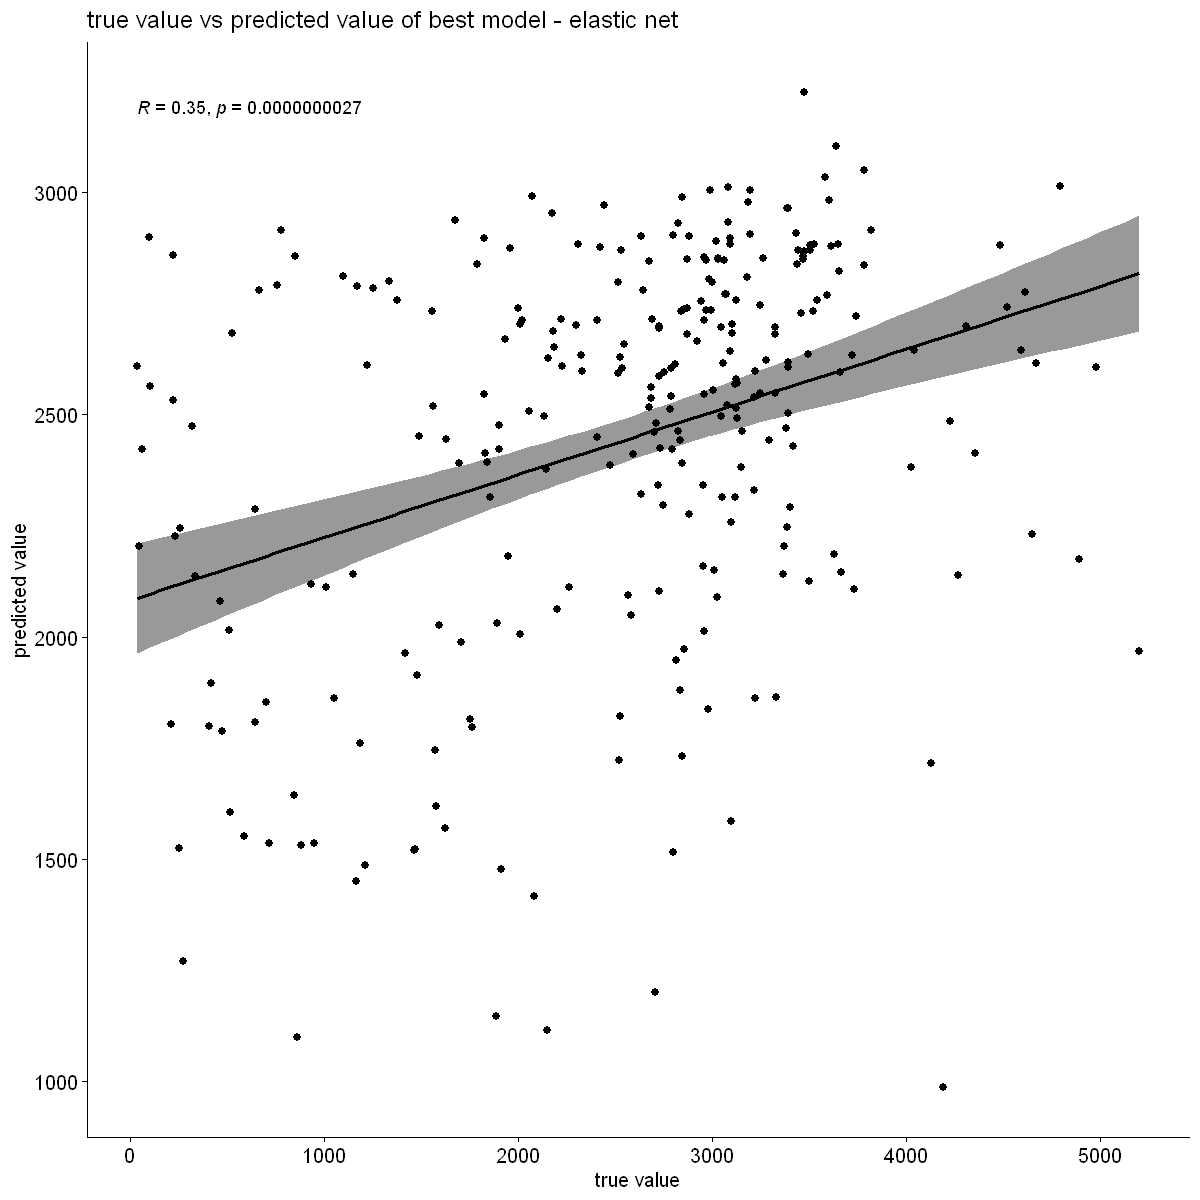

In [29]:
# model to predict the overal survival time
options(repr.plot.width = 10, repr.plot.height = 10)
library(glmnet)
library(ggpubr)
set.seed(1213)
train_split = rbinom(length(all_ALL$Gender),1,0.85)
train_split = train_split == 1
training_set = all_ALL[train_split,]
testing_set = all_ALL[!train_split,]

train_inputs = model.matrix(Overall.Survival.Time.in.Days ~Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29+Relapse,training_set)
test_inputs = model.matrix(Overall.Survival.Time.in.Days ~Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29+Relapse,testing_set)
train_outputs = training_set[!rowSums(is.na(training_set[c("Gender","Race","Ethnicity","Age.at.Diagnosis.in.Days","WBC.at.Diagnosis",
                       "Overall.Survival.Time.in.Days","WBC.at.Diagnosis","MRD.Day.29","DNA.Index",
                "BMA.Blasts.Day.8","BMA.Blasts.Day.29","Relapse")])),]
train_outputs = train_outputs$Overall.Survival.Time.in.Days
test_outputs = testing_set[!rowSums(is.na(testing_set[c("Gender","Race","Ethnicity","Age.at.Diagnosis.in.Days","WBC.at.Diagnosis",
                       "Overall.Survival.Time.in.Days","WBC.at.Diagnosis","MRD.Day.29","DNA.Index",
                "BMA.Blasts.Day.8","BMA.Blasts.Day.29","Relapse")])),]
test_outputs = test_outputs$Overall.Survival.Time.in.Days

ridge_survival = glmnet(train_inputs,train_outputs,family= "gaussian",alpha = 0)
elastic_survival = glmnet(train_inputs,train_outputs,family="gaussian",alpha=0.5)
lasso_survival = glmnet(train_inputs,train_outputs,family="gaussian",alpha=1)

# coef(lasso_survival)
lasso_pred = predict(lasso_survival, s = lasso_survival$lambda.1se,newx=test_inputs)
mse_lasso = mean((test_outputs-lasso_pred)^2)
mse_lasso
tLL = lasso_survival$nulldev - deviance(lasso_survival)
k = lasso_survival$df
n = lasso_survival$nobs
lasso_aicc = min(-tLL+2*k+2*k*(k+1)/(n-k-1))
tLL = ridge_survival$nulldev - deviance(ridge_survival)
k = ridge_survival$df
n = ridge_survival$nobs
ridge_aicc = -tLL+2*k+2*k*(k+1)/(n-k-1)
tLL = elastic_survival$nulldev - deviance(elastic_survival)
k = elastic_survival$df
n = elastic_survival$nobs
elastic_aicc = -tLL+2*k+2*k*(k+1)/(n-k-1)

cat(sprintf("Model AIC: LASSO - %.0f \n Ridge - %.0f \n Elastic Net - %.0f",lasso_aicc,min(ridge_aicc),min(elastic_aicc)))


best_ridge_aic = match(c(min(ridge_aicc)),ridge_aicc)
best_elastic_aic = match(c(min(elastic_aicc)),elastic_aicc)

best_ridge_pred = predict(ridge_survival,s = ridge_survival$lambda[best_ridge_aic],newx=test_inputs)
mse_best_ridge = mean((test_outputs-best_ridge_pred)^2)
cat(sprintf("\n\nRidge MSE: %.0f",mse_best_ridge))

best_elastic_pred = predict(elastic_survival, s = elastic_survival$lambda[best_elastic_aic],newx=test_inputs)
mse_best_elastic = mean((test_outputs-best_elastic_pred)^2)
cat(sprintf("\n\nElastic Net MSE: %.0f",mse_best_elastic))

pred_cor_ridge = data.frame(matrix(0,nrow = length(test_outputs),ncol = 2))
colnames(pred_cor_ridge) = c("predicted value","true value")
pred_cor_ridge["predicted value"] = best_ridge_pred
pred_cor_ridge["true value"] = test_outputs

pred_cor_elastic = data.frame(matrix(0,nrow = length(test_outputs),ncol = 2))
colnames(pred_cor_elastic) = c("predicted value","true value")
pred_cor_elastic["predicted value"] = best_elastic_pred
pred_cor_elastic["true value"] = test_outputs

par(mfrow = c(1,2))
plot(ridge_survival,xvar = "lambda",label=TRUE)
plot(elastic_survival,xvar = "lambda",label=TRUE)
par(mfrow = c(1,2))
ggscatter(pred_cor_ridge, x = "true value", y = "predicted value",add = "reg.line",conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",main = "true value vs predicted value of best ridge model")
ggscatter(pred_cor_elastic, x = "true value", y = "predicted value",add = "reg.line",conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",main = "true value vs predicted value of best model - elastic net")

coef(elastic_survival,s=elastic_survival$lambda[best_elastic_aic])

`geom_smooth()` using formula 'y ~ x'




Call:
lm(formula = Overall.Survival.Time.in.Days ~ Gender + Race + 
    Ethnicity + Age.at.Diagnosis.in.Days + WBC.at.Diagnosis + 
    MRD.Day.29 + WBC.at.Diagnosis + DNA.Index + BMA.Blasts.Day.8 + 
    BMA.Blasts.Day.29 + Relapse, data = training_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-2911.4  -598.1   114.7   594.2  3021.5 

Coefficients:
                                                Estimate Std. Error t value
(Intercept)                                   2262.74091  399.78628   5.660
GenderMale                                      52.77821   50.90249   1.037
RaceAsian                                       23.40665  363.90791   0.064
RaceBlack or African American                   93.73946  354.50913   0.264
RaceNative Hawaiian or other Pacific Islander  606.73982  498.76223   1.216
RaceUnknown                                    366.03729  351.51168   1.041
RaceWhite                                      292.85904  342.58276   0.855
EthnicityNot Hispanic or Lati

[1] 24890.41

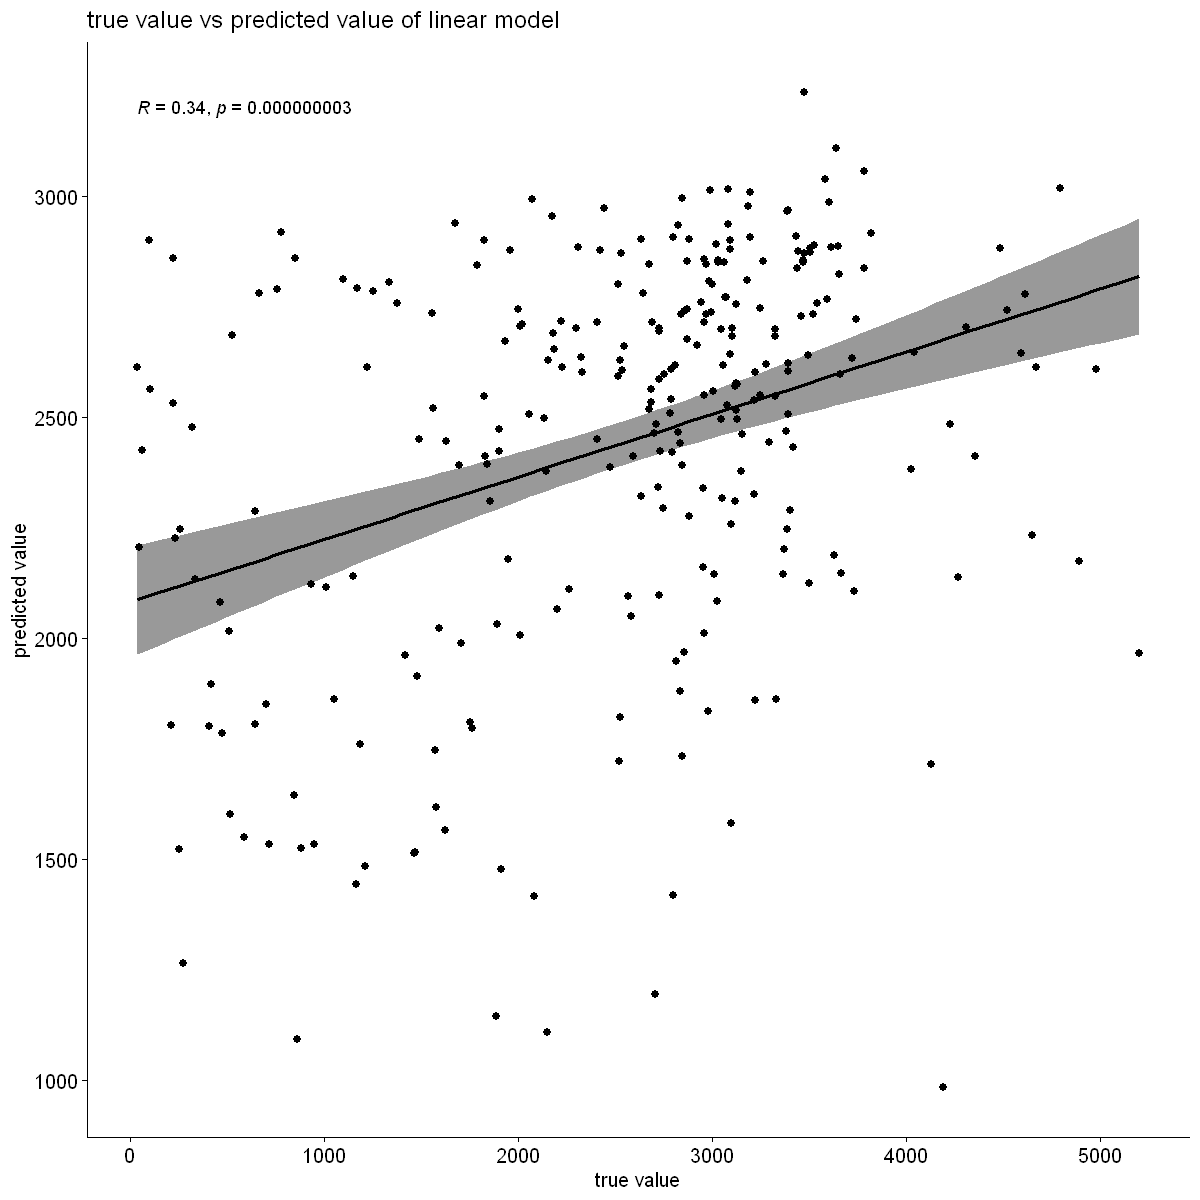

In [23]:
# using linear model
lm_survival = lm(Overall.Survival.Time.in.Days ~ Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29+Relapse,data=training_set)
lm_predict = predict(lm_survival,newdata = testing_set)
lm_cor = data.frame(matrix(0,nrow=length(lm_predict),ncol=2))
colnames(lm_cor) = c("predicted value","true value")
lm_cor["predicted value"] = lm_predict
lm_cor["true value"] = testing_set$Overall.Survival.Time.in.Days
ggscatter(lm_cor, x = "true value", y = "predicted value",add = "reg.line",conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",main = "true value vs predicted value of linear model")
summary(lm_survival)
AIC(lm_survival)

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



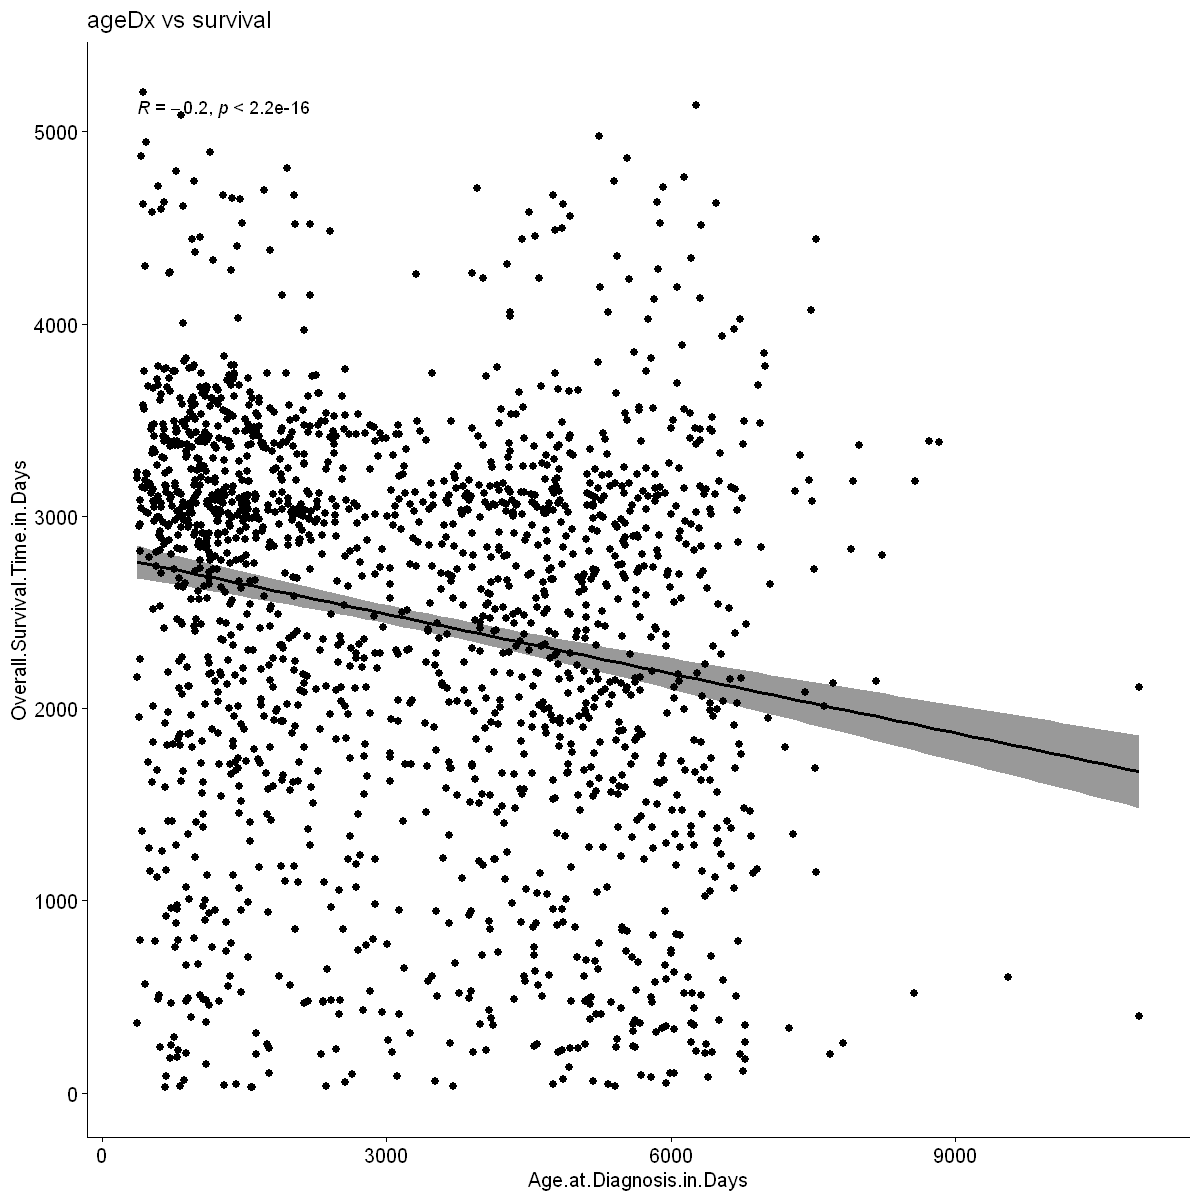

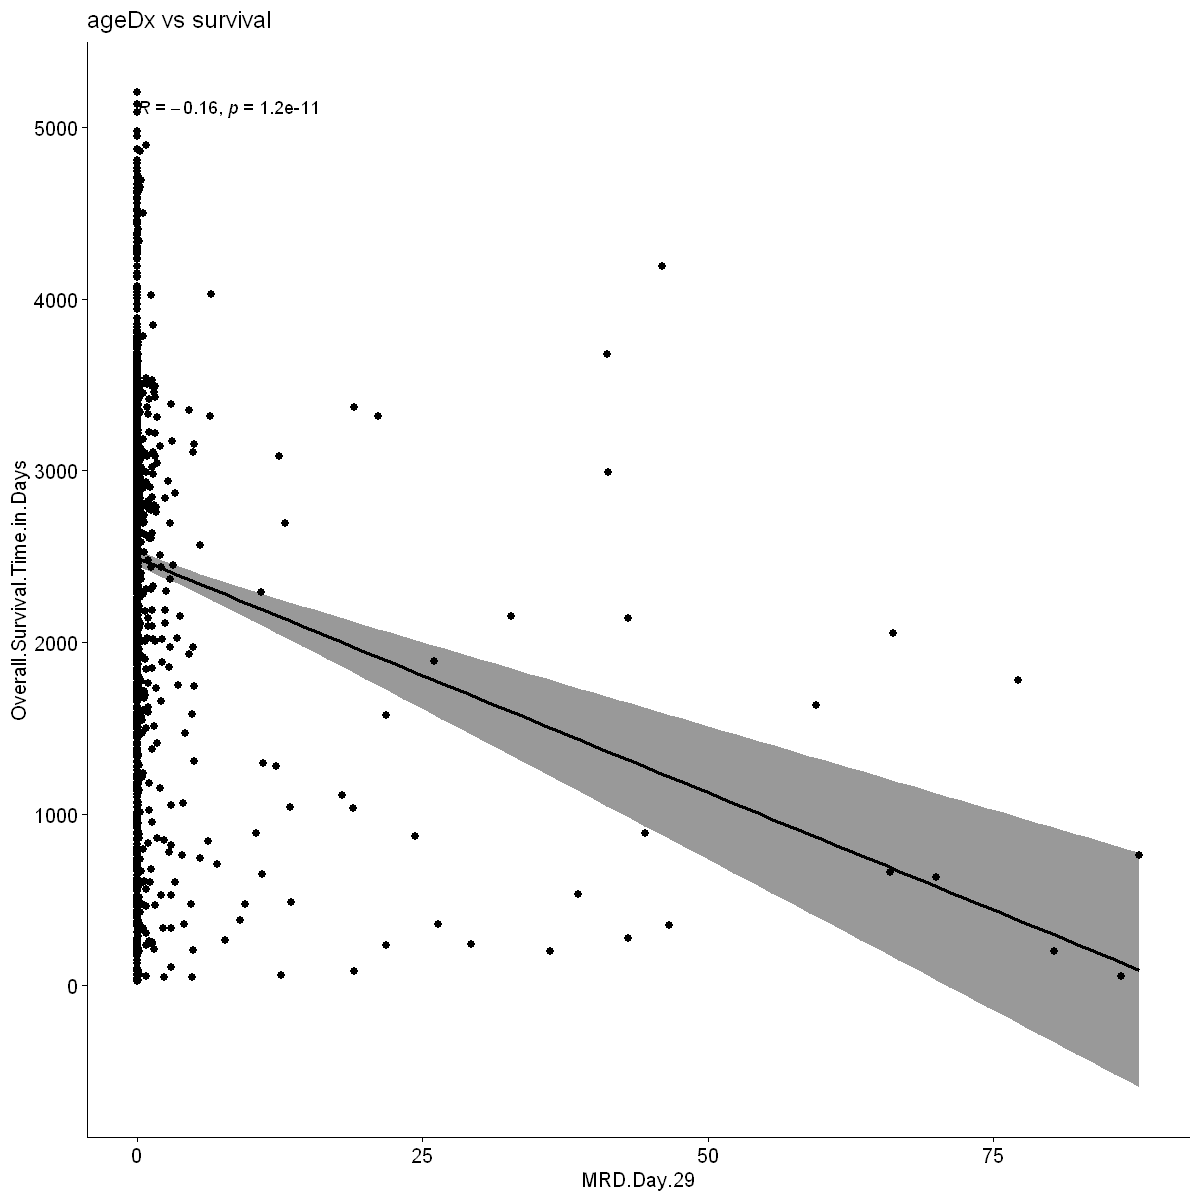

In [24]:
# further investigating correlations
ggscatter(all_ALL, x = "Age.at.Diagnosis.in.Days", y = "Overall.Survival.Time.in.Days",add = "reg.line",conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",main = "ageDx vs survival")
ggscatter(all_ALL, x = "MRD.Day.29", y = "Overall.Survival.Time.in.Days",add = "reg.line",conf.int = TRUE, 
          cor.coef = TRUE, cor.method = "pearson",main = "ageDx vs survival")

Next, I performed survival analysis and compared survival curves differentiated by patient demographics to determine if they had a signficant impact.

  [1] 2447  3612+ 3821+ 3680+ 3668+ 2403+ 3781+ 3593+ 3529+ 3612+ 3598+ 3403+
 [13] 3575+ 3786+ 3572+ 3833+ 2755+ 3626+ 3784+ 3024+ 3766+ 3767+  777+ 3679+
 [25] 1909+ 2687+ 3540+ 3479+ 2954+ 1752  3632+ 3734+ 3442+ 3444+ 3443+   65+
 [37] 1904+ 2749+ 3506+ 2887+ 3743+ 3622+ 3460+ 2865+ 3733+ 2952+ 3424+ 3458+
 [49] 3742+ 1179+ 3669+ 3611+ 3490+ 3668+ 3538+ 1418  3641+ 3445+ 3744+ 3768+
 [61] 3423+  775  3055+ 3752+ 3468+ 3362+ 3492+ 3656+ 3680+ 3522+  308   149 
 [73] 2110  3582+  179  3550+ 3643+ 3664+ 3065  3556+ 3742+ 3051  2628+ 3640+
 [85] 3604+ 3381+ 3601+ 3424+ 3417+ 3037+ 3710+ 3429+ 3731+ 3493+ 3394+ 3612+
 [97] 2174+ 3623+  252  3553+

Call: survfit(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    1, data = all_ALL)

 time n.risk n.event survival  std.err lower 95% CI upper 95% CI
    1   1783       0    1.000 0.000000        1.000        1.000
   30   1781       0    1.000 0.000000        1.000        1.000
   60   1769       2    0.999 0.000796        0.997        1.000
   90   1762       2    0.998 0.001127        0.996        1.000
  180   1752       7    0.994 0.001871        0.990        0.997
  270   1719      26    0.979 0.003418        0.972        0.986
  360   1703      14    0.971 0.004000        0.963        0.979
  450   1684      16    0.962 0.004569        0.953        0.971
  540   1646      29    0.945 0.005431        0.935        0.956
  630   1628      17    0.936 0.005869        0.924        0.947
  720   1611      14    0.927 0.006201        0.915        0.940
  810   1592      15    0.919 0.006532        0.906        0.932
  900   1573      13    0.911 0.006803        0.898        0

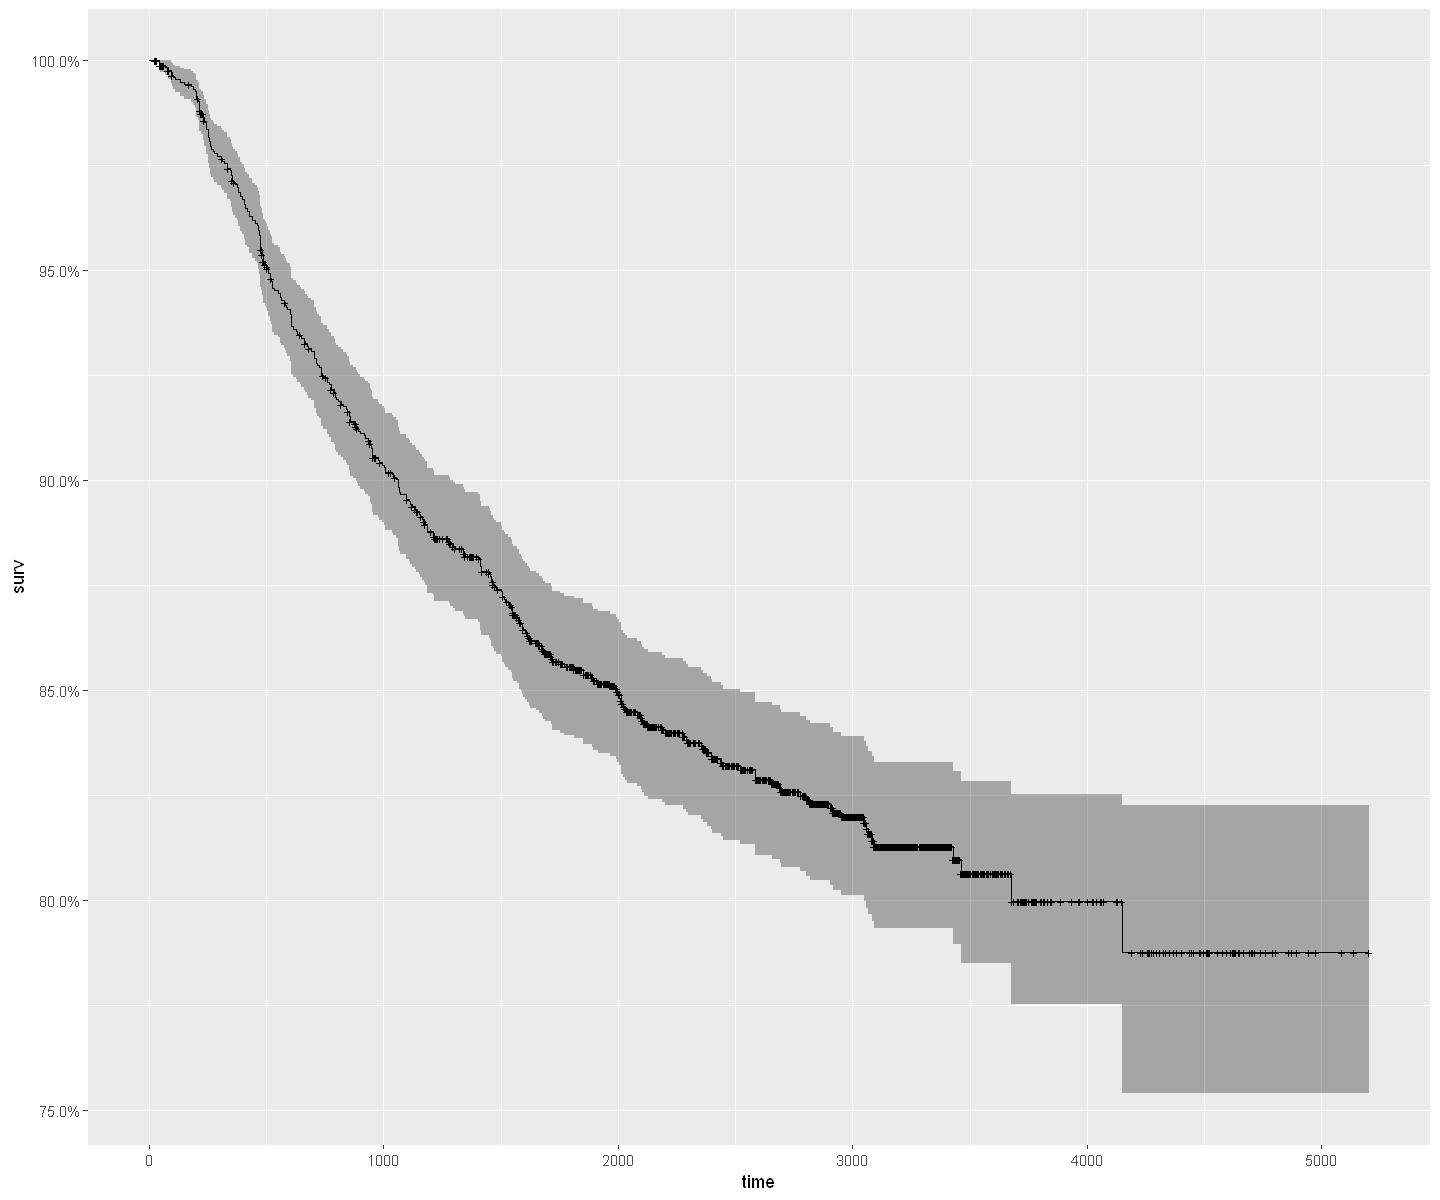

In [11]:
# Survival analysis hazard based models because shouldn't use linear or logistic
library(survival)
library(ggplot2)
library(dplyr)
# install.packages("ggfortify")
library(ggfortify)
options(repr.plot.width = 12, repr.plot.height = 10)

# set vital status to 1 for dead and 2 for censored
vit_stats = all_ALL$Vital.Status == "Dead"
all_ALL$Status[vit_stats] = 1
all_ALL$Status[!vit_stats] = 0

# building standard survival object for cox proportional hazard model
surv_obj = with(all_ALL, Surv(Overall.Survival.Time.in.Days,Status))
head(surv_obj,100)

# cox_model survival over time
km_fit = survfit(Surv(Overall.Survival.Time.in.Days,Status)~1, data = all_ALL)
summary(km_fit, times =  c(1,30,60,90*(1:10)))
autoplot(km_fit)

Call:
survdiff(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    Relapse, data = all_ALL)

                 N Observed Expected (O-E)^2/E (O-E)^2/V
Relapse=FALSE 1377       66    246.9       133       722
Relapse=TRUE   406      237     56.1       584       722

 Chisq= 722  on 1 degrees of freedom, p= <2e-16 

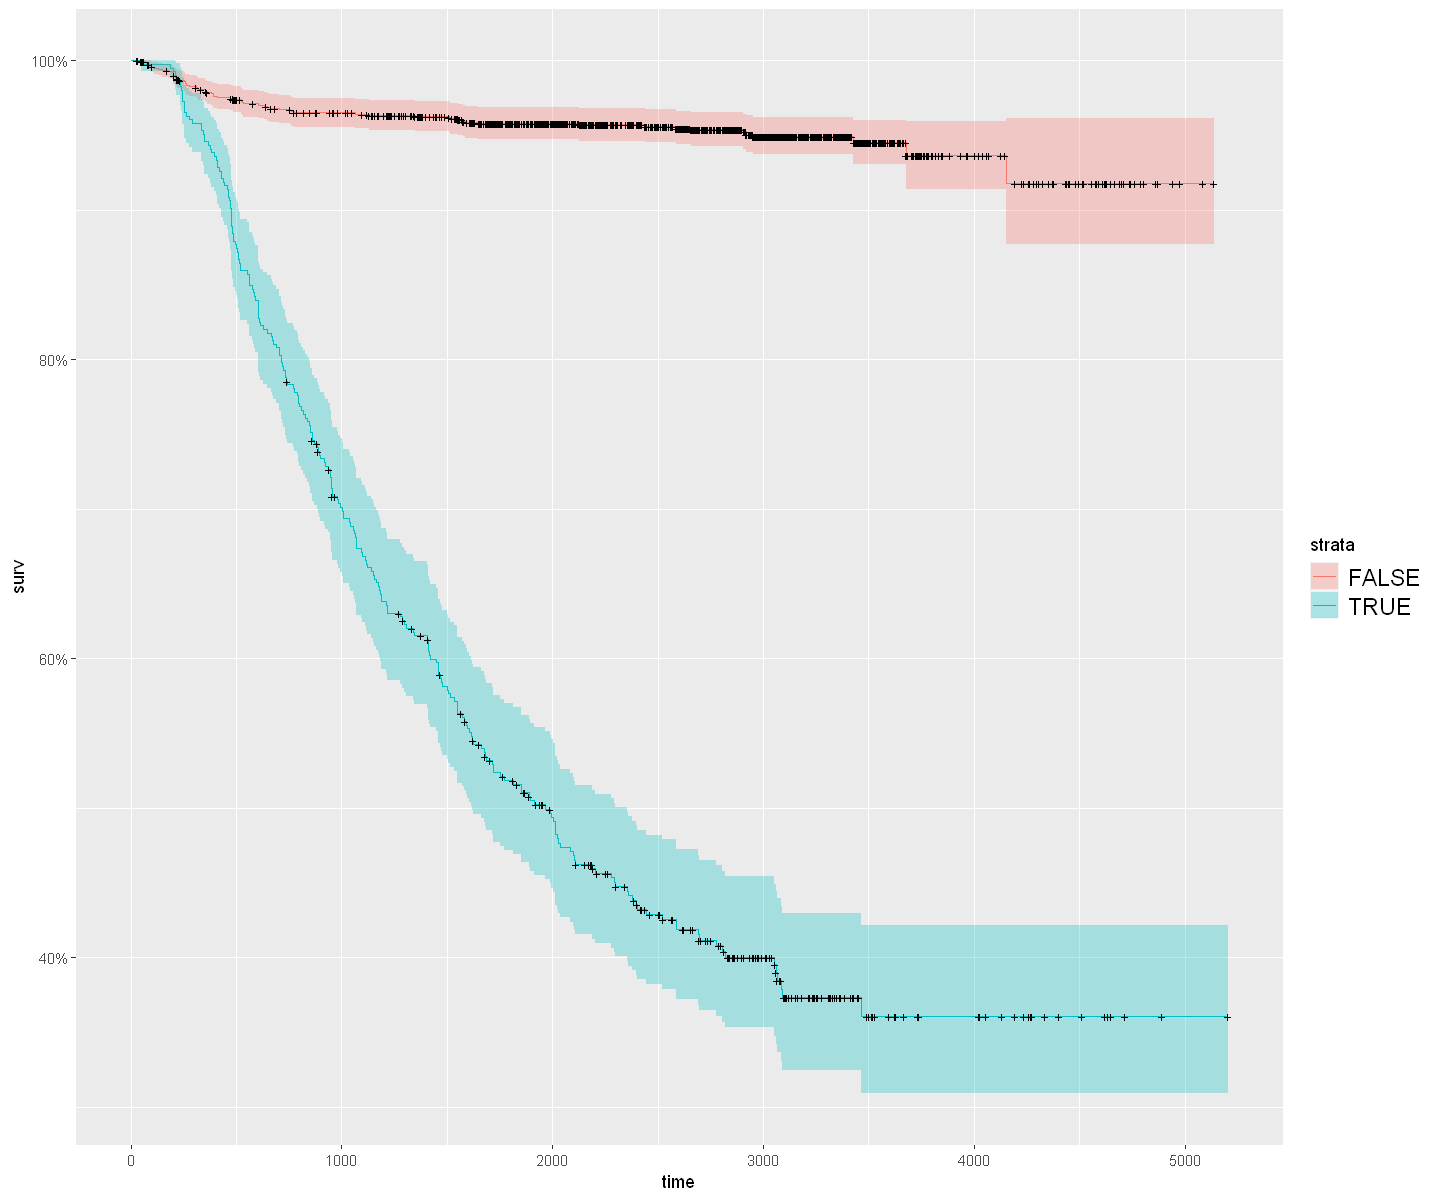

In [12]:
km_relapse_fit = survfit(Surv(Overall.Survival.Time.in.Days,Status)~Relapse, data = all_ALL)
autoplot(km_relapse_fit) + theme(legend.text=element_text(size=14))
survdiff(Surv(Overall.Survival.Time.in.Days,Status)~Relapse, data = all_ALL)

Whether replapse had occured (True) or not (False) has a major effect on patient outcome.

Call:
survdiff(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    AG, data = all_AG)

               N Observed Expected (O-E)^2/E (O-E)^2/V
AG=LTaverage 934      118      166      13.9      30.9
AG=OVaverage 849      185      137      16.9      30.9

 Chisq= 30.9  on 1 degrees of freedom, p= 0.00000003 

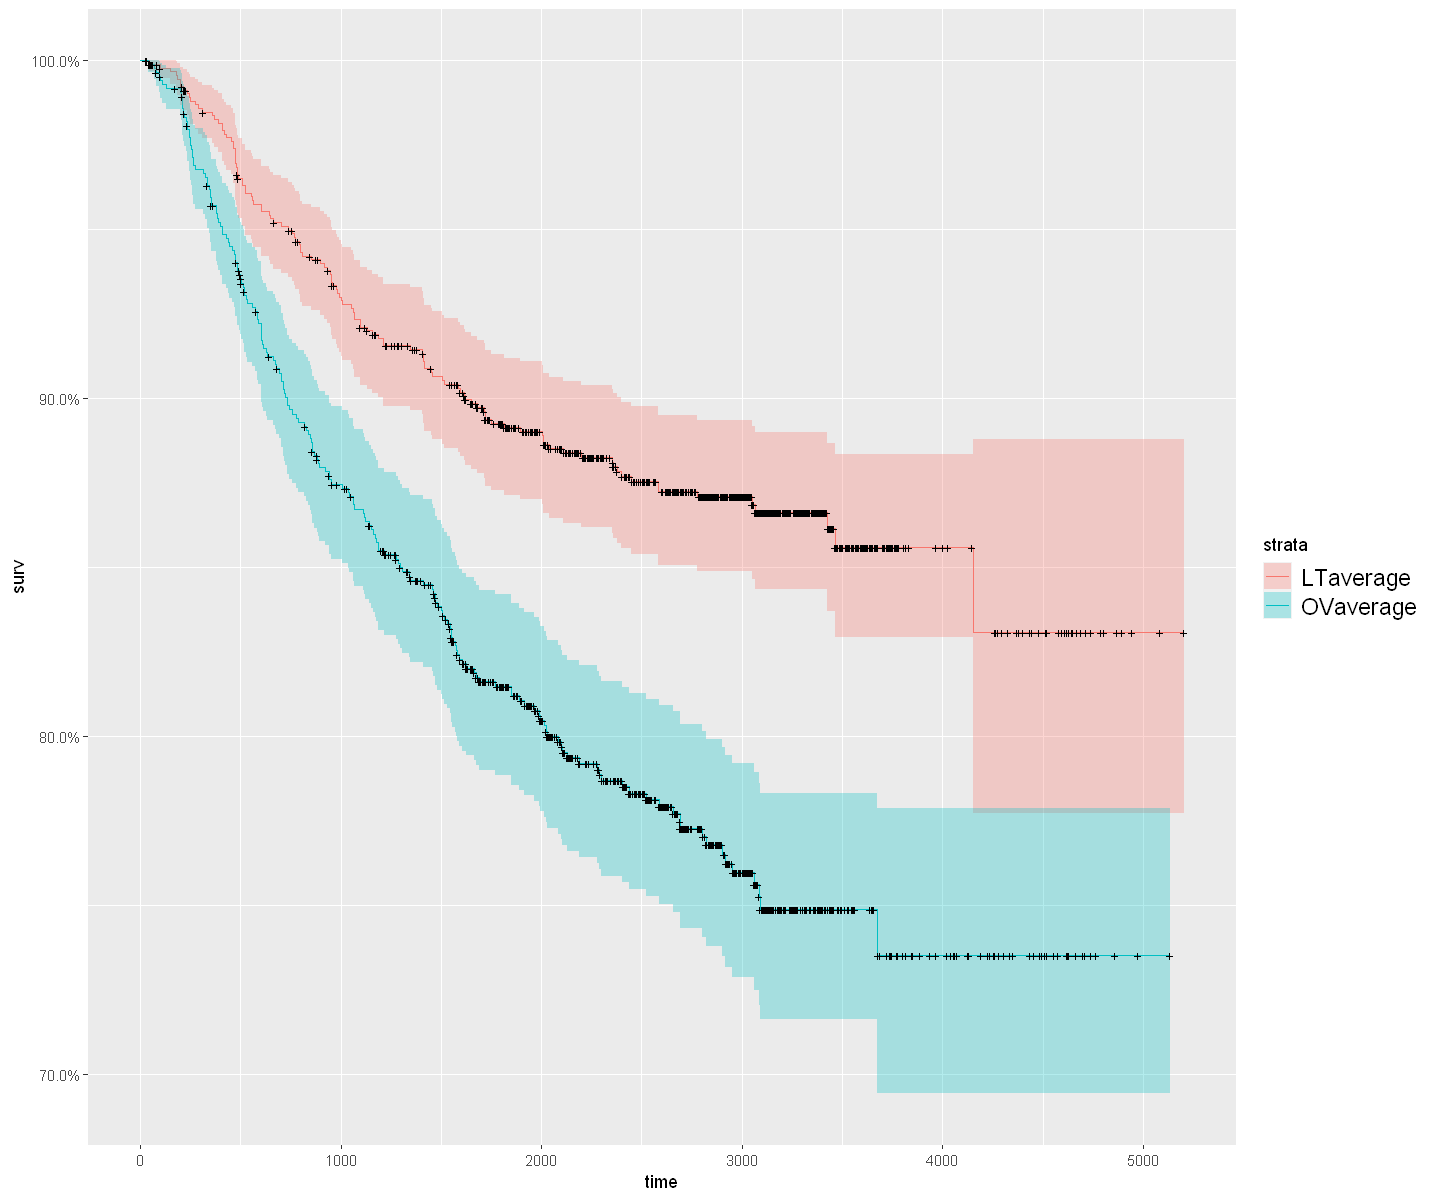

In [13]:
# Looking at age as the distinguishing factor
all_AG = mutate(all_ALL, AG = ifelse((Age.at.Diagnosis.in.Days <= 3260), "LTaverage", "OVaverage"),
              AG = factor(AG))
km_AG_fit = survfit(Surv(Overall.Survival.Time.in.Days,Status)~AG,data = all_AG)
options(repr.plot.width = 12, repr.plot.height = 10)
autoplot(km_AG_fit) + theme(legend.text=element_text(size=14))
survdiff(Surv(Overall.Survival.Time.in.Days,Status) ~  AG, data=all_AG)

Call:
survdiff(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    Gender, data = all_ALL)

                 N Observed Expected (O-E)^2/E (O-E)^2/V
Gender=Female  718      117      121     0.164     0.274
Gender=Male   1065      186      182     0.110     0.274

 Chisq= 0.3  on 1 degrees of freedom, p= 0.6 

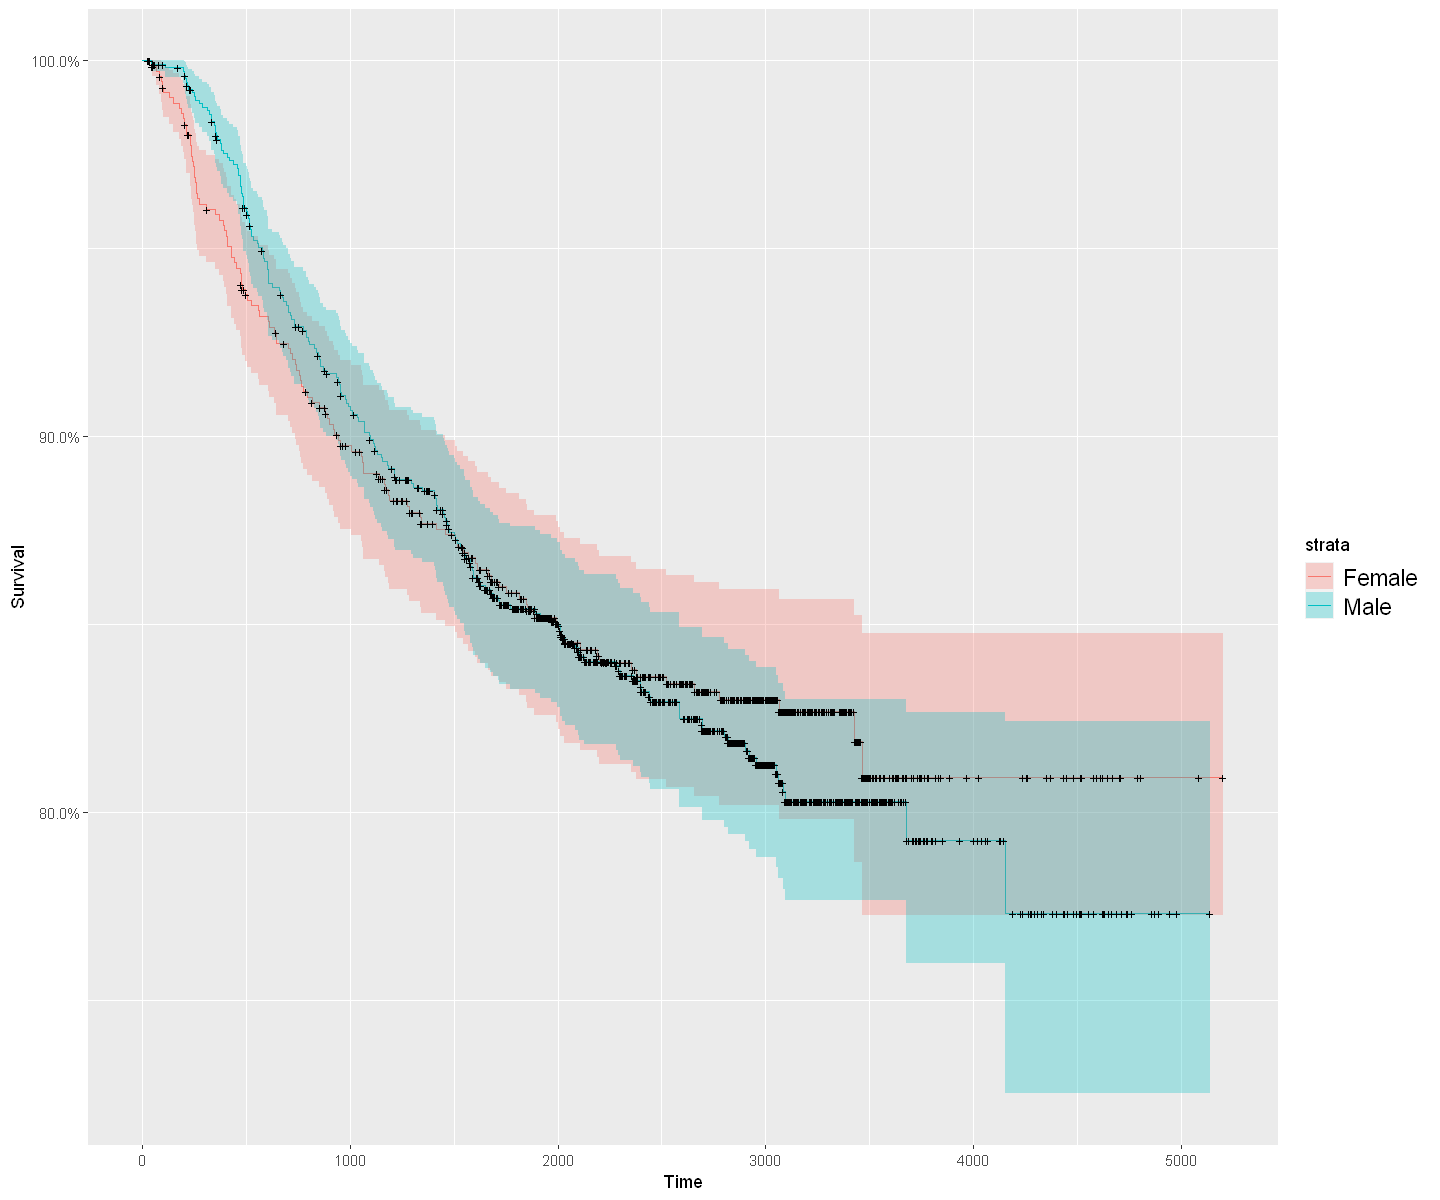

In [14]:
km_gender_fit = survfit(Surv(Overall.Survival.Time.in.Days,Status)~Gender,data = all_ALL)
autoplot(km_gender_fit,xlab = "Time",ylab = "Survival",title = "Survival by Gender") + theme(legend.text=element_text(size=14))
survdiff(Surv(Overall.Survival.Time.in.Days,Status) ~  Gender, data=all_ALL)

Call:
survdiff(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    Race, data = all_ALL)

                                                  N Observed Expected (O-E)^2/E
Race=American Indian or Alaska Native             9        3     1.25     2.434
Race=Asian                                       76        8    12.43     1.578
Race=Black or African American                  126       26    19.82     1.925
Race=Native Hawaiian or other Pacific Islander    9        1     1.73     0.309
Race=Unknown                                    225       41    38.62     0.147
Race=White                                     1338      224   229.14     0.115
                                               (O-E)^2/V
Race=American Indian or Alaska Native              2.444
Race=Asian                                         1.647
Race=Black or African American                     2.061
Race=Native Hawaiian or other Pacific Islander     0.311
Race=Unknown                                       0.168

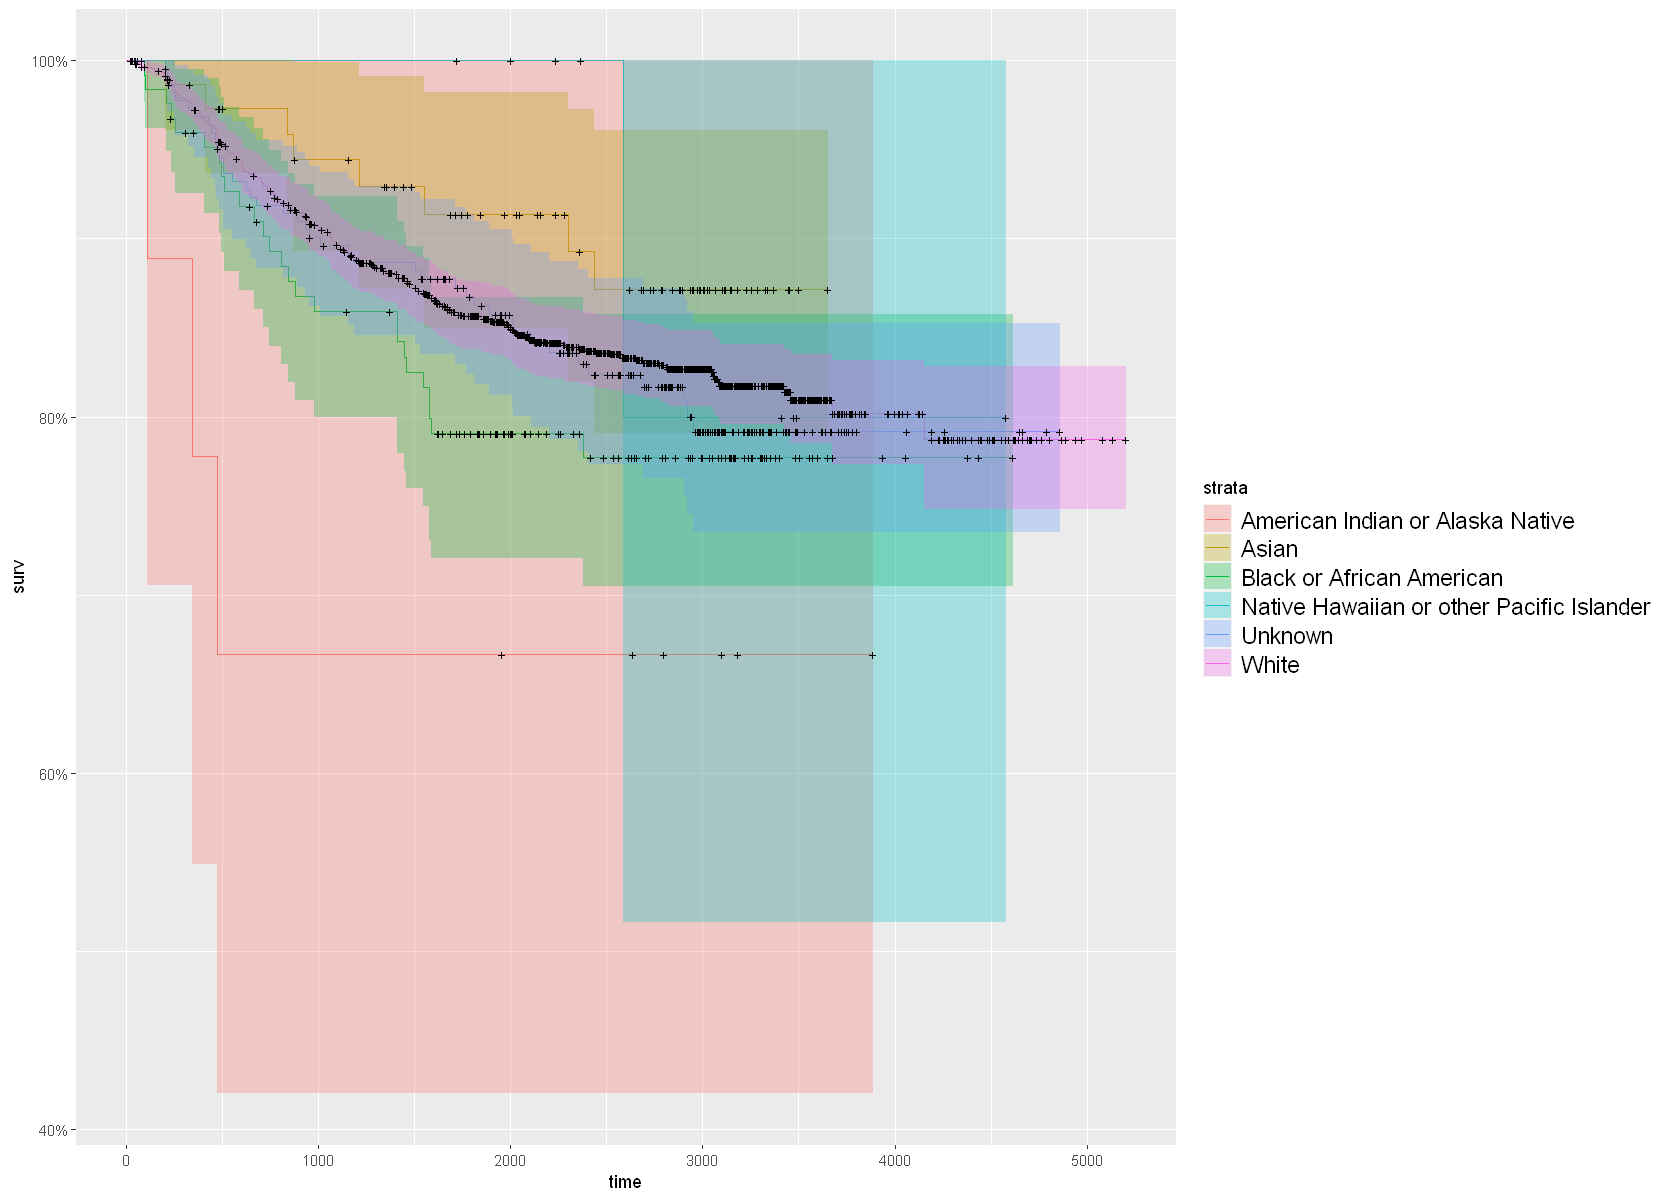

In [15]:
km_gender_fit = survfit(Surv(Overall.Survival.Time.in.Days,Status)~Race,data = all_ALL)
options(repr.plot.width = 14, repr.plot.height = 10)
autoplot(km_gender_fit) + theme(legend.text=element_text(size=14))
survdiff(Surv(Overall.Survival.Time.in.Days,Status) ~  Race, data=all_ALL)


Age also proved to have a signficant effect on patient outcomes, however, neither gender nor race had a signficant effect. For race in particular this could be due to small sample sizes from some races, like American Indian/Alaskan Native.

Next, to determine the extent of the effect these different variables, including the continous ones with test results, all were used in Hazard Regression to determine patient risk at different timepoints. 

Call:
coxph(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    Gender + Race + Ethnicity + Age.Years + WBC.at.Diagnosis + 
        MRD.Day.29 + WBC.at.Diagnosis + DNA.Index + BMA.Blasts.Day.8 + 
        BMA.Blasts.Day.29 + Relapse, data = all_ALL)

  n= 1702, number of events= 286 
   (81 observations deleted due to missingness)

                                                    coef  exp(coef)   se(coef)
GenderMale                                    -0.0072207  0.9928053  0.1235580
RaceAsian                                     -0.6157631  0.5402285  0.6887251
RaceBlack or African American                  0.1569462  1.1699326  0.6192443
RaceNative Hawaiian or other Pacific Islander -0.0680650  0.9341998  1.1633754
RaceUnknown                                   -0.1757777  0.8388045  0.6072539
RaceWhite                                     -0.2747960  0.7597271  0.5891081
EthnicityNot Hispanic or Latino               -0.1569339  0.8547606  0.1597851
EthnicityUnknown          

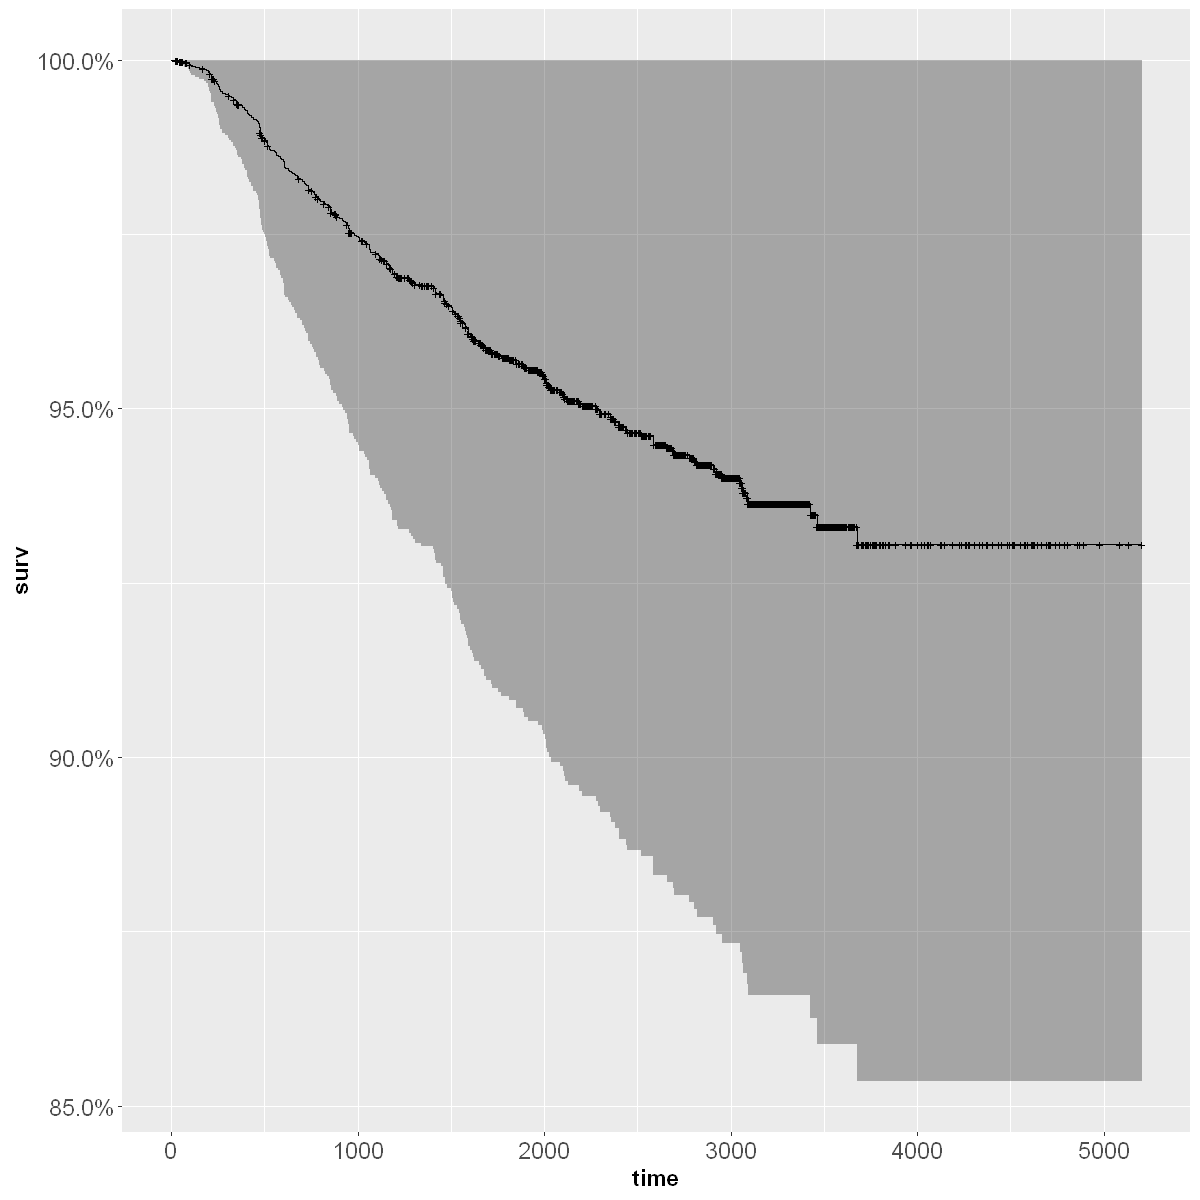

In [16]:
# cox phm that uses more covariates
all_ALL$Age.Years = all_ALL$Age.at.Diagnosis.in.Days/365
cox_mod = coxph(Surv(Overall.Survival.Time.in.Days,Status) ~ Gender+Race+Ethnicity+Age.Years+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29+Relapse, data = all_ALL)
summary(cox_mod)
cox_fit = survfit(cox_mod)
options(repr.plot.width = 10, repr.plot.height = 10)
autoplot(cox_fit) +theme(axis.text=element_text(size=14),
        axis.title=element_text(size=14,face="bold"))

Call:
aareg(formula = Surv(Overall.Survival.Time.in.Days, Status) ~ 
    Gender + Race + Ethnicity + Age.at.Diagnosis.in.Days + WBC.at.Diagnosis + 
        MRD.Day.29 + WBC.at.Diagnosis + DNA.Index + BMA.Blasts.Day.8 + 
        BMA.Blasts.Day.29 + Relapse, data = all_ALL)

  n= 1783 
    285 out of 286 unique event times used

                                                      slope         coef
Intercept                                      0.0002490000  0.000736000
GenderMale                                    -0.0000116000 -0.000003930
RaceAsian                                     -0.0002190000 -0.000621000
RaceBlack or African American                 -0.0001240000 -0.000128000
RaceNative Hawaiian or other Pacific Islander -0.0001860000 -0.000186000
RaceUnknown                                   -0.0001880000 -0.000400000
RaceWhite                                     -0.0001690000 -0.000351000
EthnicityNot Hispanic or Latino               -0.0000330000 -0.000180000
EthnicityUnkno

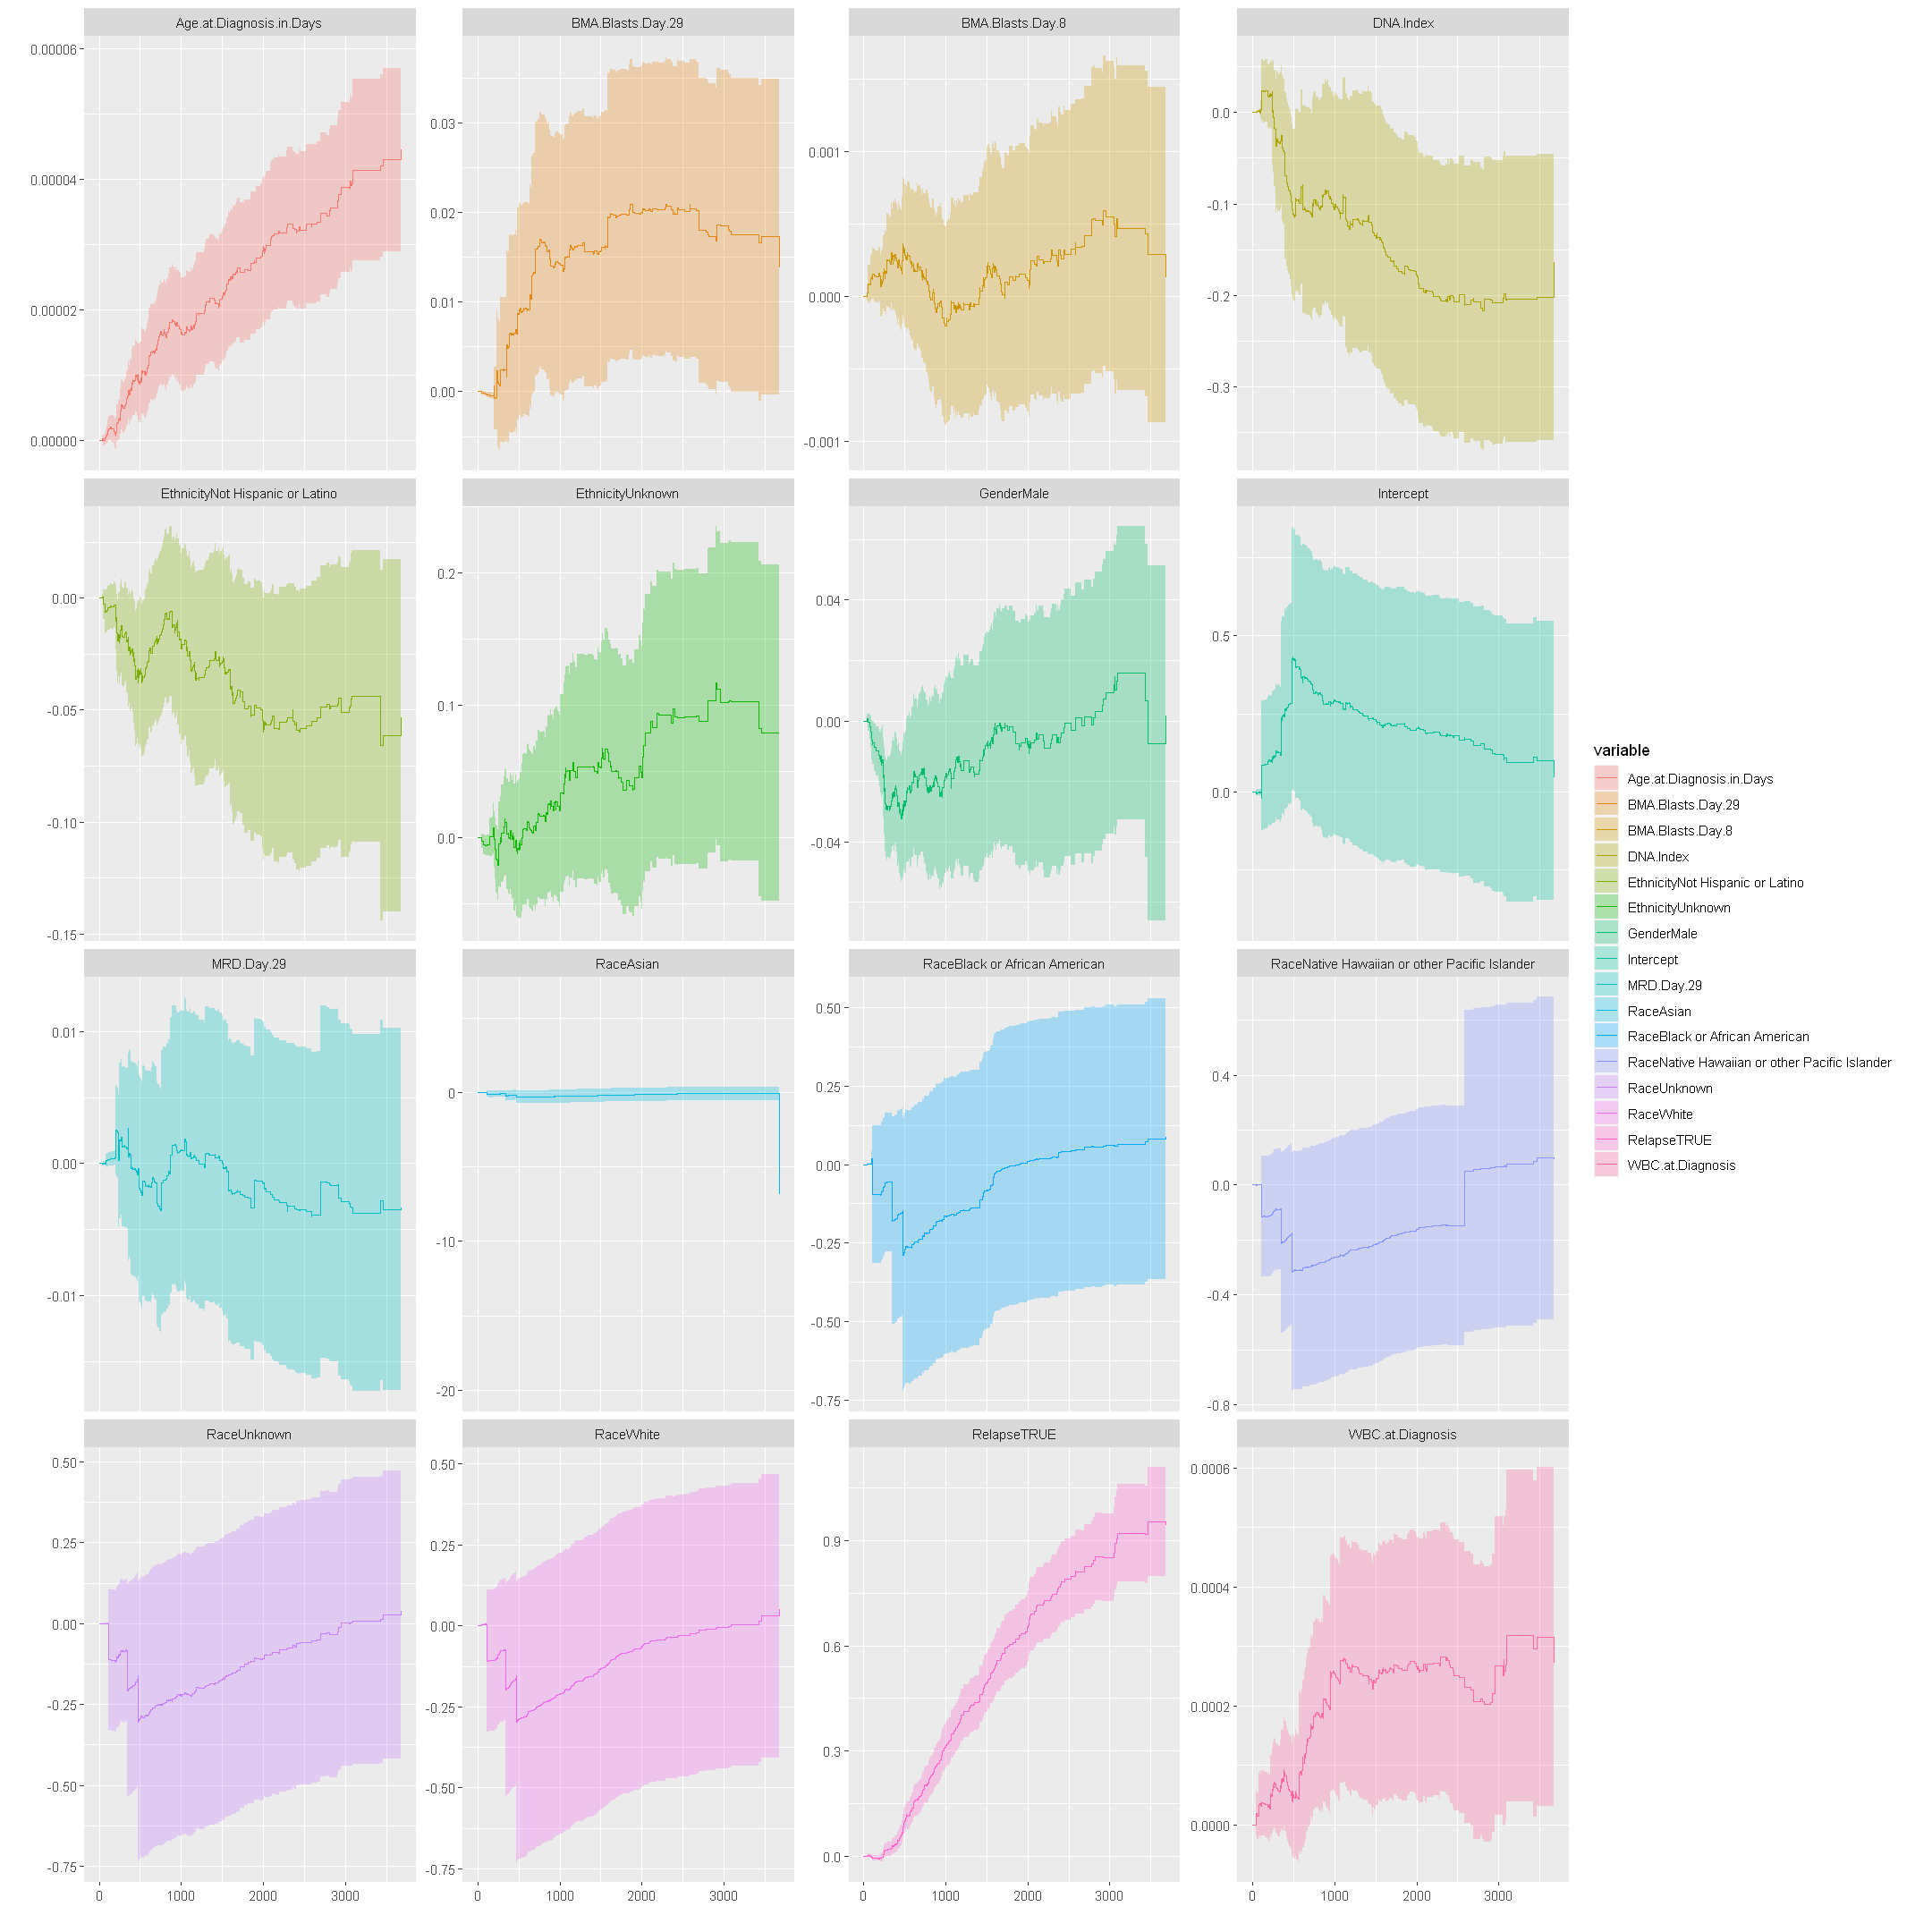

In [30]:
# using aa fit on same variables as above
aa_fit = aareg(Surv(Overall.Survival.Time.in.Days,Status) ~ Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29+Relapse, data = all_ALL)
aa_fit
options(repr.plot.width = 18, repr.plot.height = 18)
autoplot(aa_fit,label.size=2) + theme(plot.title = element_text(size=22))


Hazard regression revealed that as seen with survival analysis Relapse and age of diagnosis are two of the most impactful predictors of survival. Aalen regression showed that the dependency on these variables increased over time. The Cox PH model revealed - through hazard ratio - that an increased DNA index decreased risk - with the second greatest magnitude at 82% decrease, while relapse increased risk by over 1800%. 

Because of its massive effect on survival over time I thought it would be interesting to see if relapse could be predicted from the variables already being used and if patient demographics could reveal a predisposition towards relapse. 

In [25]:
# naive bayes to predict relapse - first missing data was imputed using regression from the present data
library(caret)
library(tidyverse)
library(ggplot2)
library(caret)
library(psych)
library(rpart)
# install.packages("randomForest")
library(randomForest)
# install.packages("Amelia")
library(Amelia)
# install.packages("mice")
library(mice)
# install.packages("e1071")
library(e1071)
# install.packages("klaR")
# install.packages("questionr")
# library(klaR)
# install.packages("naivebayes")
var_nb = c("Gender","Race","Ethnicity","Cell.of.Origin",
           "ETV6.RUNX1.Fusion.Status","Age.at.Diagnosis.in.Days","DNA.Index",
             "WBC.at.Diagnosis","MRD.Day.29","BMA.Blasts.Day.8","BMA.Blasts.Day.29")
mice_mod = mice(all_ALL[,var_nb],method = 'rf')
mice_complete = complete(mice_mod)
all_ALL$DNA.Index = mice_complete$DNA.Index
all_ALL$MRD.Day.29 = mice_complete$MRD.Day.29
all_ALL$BMA.Blasts.Day.8 = mice_complete$BMA.Blasts.Day.8
all_ALL$BMA.Blasts.Day.29 = mice_complete$BMA.Blasts.Day.29



 iter imp variable
  1   1
  1   2
  1   3
  1   4
  1   5
  2   1
  2   2
  2   3
  2   4
  2   5
  3   1
  3   2
  3   3
  3   4
  3   5
  4   1
  4   2
  4   3
  4   4
  4   5
  5   1
  5   2
  5   3
  5   4
  5   5


In [26]:
# create training and testing set
set.seed(999)
library(naivebayes)
indxTrain = createDataPartition(y = all_ALL$Relapse, p = 0.75, list = FALSE)
nb_train = all_ALL[indxTrain,]

nb_test = all_ALL[-indxTrain,]
nb_in = nb_train[,var_nb]
nb_out = as.factor(nb_train$Relapse)

nb_relapse = naive_bayes(Relapse ~ Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29, data = nb_train)
nb_relapse_demo = naive_bayes(Relapse ~ Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days, data = nb_train)
nb_relapse_non = naive_bayes(Relapse ~ WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29, data = nb_train)
nb_pred = predict(nb_relapse, nb_test)
nb_pred_demo = predict(nb_relapse_demo, nb_test)
nb_pred_non = predict(nb_relapse_non,nb_test)

confusionMatrix(nb_pred,as.factor(nb_test$Relapse))
confusionMatrix(nb_pred_demo,as.factor(nb_test$Relapse))
confusionMatrix(nb_pred_non,as.factor(nb_test$Relapse))


Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."
Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."
Warning message:
"predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables."


Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   295   75
     TRUE     49   26
                                          
               Accuracy : 0.7213          
                 95% CI : (0.6772, 0.7625)
    No Information Rate : 0.773           
    P-Value [Acc > NIR] : 0.99539         
                                          
                  Kappa : 0.1265          
                                          
 Mcnemar's Test P-Value : 0.02476         
                                          
            Sensitivity : 0.8576          
            Specificity : 0.2574          
         Pos Pred Value : 0.7973          
         Neg Pred Value : 0.3467          
             Prevalence : 0.7730          
         Detection Rate : 0.6629          
   Detection Prevalence : 0.8315          
      Balanced Accuracy : 0.5575          
                                          
       'Positive' Class : FALSE           
                     

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   344  101
     TRUE      0    0
                                          
               Accuracy : 0.773           
                 95% CI : (0.7312, 0.8111)
    No Information Rate : 0.773           
    P-Value [Acc > NIR] : 0.5267          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.000           
            Specificity : 0.000           
         Pos Pred Value : 0.773           
         Neg Pred Value :   NaN           
             Prevalence : 0.773           
         Detection Rate : 0.773           
   Detection Prevalence : 1.000           
      Balanced Accuracy : 0.500           
                                          
       'Positive' Class : FALSE           
                     

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   297   78
     TRUE     47   23
                                          
               Accuracy : 0.7191          
                 95% CI : (0.6749, 0.7604)
    No Information Rate : 0.773           
    P-Value [Acc > NIR] : 0.99665         
                                          
                  Kappa : 0.1022          
                                          
 Mcnemar's Test P-Value : 0.00729         
                                          
            Sensitivity : 0.8634          
            Specificity : 0.2277          
         Pos Pred Value : 0.7920          
         Neg Pred Value : 0.3286          
             Prevalence : 0.7730          
         Detection Rate : 0.6674          
   Detection Prevalence : 0.8427          
      Balanced Accuracy : 0.5455          
                                          
       'Positive' Class : FALSE           
                     

The increased balanced accuracy of the Naive Bayes models using all variables or all test result variables reveals that there is some ability to predict relapse but it is minor. Using only patient demographics both with the Naive Bayes models and logistic regression resulted in classification of all patients as no relapse and a balanced accuracy of 0.5 indicating no performance better than guessing. Logistic regression did not perform any better and performed worse when using all variables showing that for the variables chosen here there is not much signal for prediction of relapse.

In [27]:
log_dem = glm(Relapse ~ Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days, data = nb_train)
log_pred_dem = predict(log_dem,nb_test)
log_pred_dem = as.factor(log_pred_dem > 0.5)
confusionMatrix(log_pred_dem,as.factor(nb_test$Relapse))

log_non = glm(Relapse ~ Gender+Race+Ethnicity+Age.at.Diagnosis.in.Days+WBC.at.Diagnosis+
                            MRD.Day.29+WBC.at.Diagnosis+DNA.Index+BMA.Blasts.Day.8+BMA.Blasts.Day.29, data = nb_train)
log_pred_non = predict(log_non,nb_test)
log_pred_non = as.factor(log_pred_non > 0.5)
confusionMatrix(log_pred_non,as.factor(nb_test$Relapse))

Warning message in confusionMatrix.default(log_pred_dem, as.factor(nb_test$Relapse)):
"Levels are not in the same order for reference and data. Refactoring data to match."


Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   344  101
     TRUE      0    0
                                          
               Accuracy : 0.773           
                 95% CI : (0.7312, 0.8111)
    No Information Rate : 0.773           
    P-Value [Acc > NIR] : 0.5267          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.000           
            Specificity : 0.000           
         Pos Pred Value : 0.773           
         Neg Pred Value :   NaN           
             Prevalence : 0.773           
         Detection Rate : 0.773           
   Detection Prevalence : 1.000           
      Balanced Accuracy : 0.500           
                                          
       'Positive' Class : FALSE           
                     

Confusion Matrix and Statistics

          Reference
Prediction FALSE TRUE
     FALSE   343  100
     TRUE      1    1
                                          
               Accuracy : 0.773           
                 95% CI : (0.7312, 0.8111)
    No Information Rate : 0.773           
    P-Value [Acc > NIR] : 0.5267          
                                          
                  Kappa : 0.0107          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.997093        
            Specificity : 0.009901        
         Pos Pred Value : 0.774266        
         Neg Pred Value : 0.500000        
             Prevalence : 0.773034        
         Detection Rate : 0.770787        
   Detection Prevalence : 0.995506        
      Balanced Accuracy : 0.503497        
                                          
       'Positive' Class : FALSE           
                     